# Recruit restaurant Exploratory data Analysis

* This is the first notebook for the Capstone MLND and this notebook is heavily based on the kernel:
https://www.kaggle.com/headsortails/be-my-guest-recruit-restaurant-eda

* In this notebook an extensive exploratory data analysis is performed for the recruit restaurant visitor data

    1) The take away points from this notebook will be used in the further notebooks for feature engineering
    
    2) In this notebook some preliminary data wrangling will be performed when necessary
    
    3) Individual files will be explored first and then combined dataframes will be explored

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import calendar

In [2]:
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 1) Data I/O

In [3]:
air_reserve = pd.read_csv('air_reserve.csv')
hpg_reserve = pd.read_csv('hpg_reserve.csv')
air_store_info = pd.read_csv('air_store_info.csv')
hpg_store_info = pd.read_csv('hpg_store_info.csv')
air_visit_data = pd.read_csv('air_visit_data.csv')
date_info = pd.read_csv('date_info.csv')
store_id_relation = pd.read_csv('store_id_relation.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 2) Exploring air visits data

In [4]:
air_visit_data.head()

air_store_id  visit_date  visitors
0  air_ba937bf13d40fb24  2016-01-13        25
1  air_ba937bf13d40fb24  2016-01-14        32
2  air_ba937bf13d40fb24  2016-01-15        29
3  air_ba937bf13d40fb24  2016-01-16        22
4  air_ba937bf13d40fb24  2016-01-18         6

In [5]:
air_visit_data.describe()

visitors
count  252108.000000
mean       20.973761
std        16.757007
min         1.000000
25%         9.000000
50%        17.000000
75%        29.000000
max       877.000000

In [6]:
air_visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null object
visitors        252108 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [7]:
visits=air_visit_data.groupby(['visit_date'])
total_num_visitors=visits['visitors'].agg(np.sum)
total_visitors_by_date_air=pd.DataFrame(total_num_visitors)
total_visitors_by_date_air.reset_index(inplace=True)

In [8]:
total_visitors_by_date_air['visit_date']=pd.to_datetime(total_visitors_by_date_air['visit_date'])
total_visitors_by_date_air.set_index(['visit_date'],inplace=True)
total_visitors_by_date_air.name=None
total_visitors_by_date_air.head()

visitors
visit_date          
2016-01-01      1033
2016-01-02      1764
2016-01-03      2368
2016-01-04      3326
2016-01-05      3927

In [9]:
hol=date_info
hol=date_info.rename(columns={'calendar_date':'visit_date'})
hol['visit_date'] = pd.to_datetime(hol['visit_date'])
hol.set_index(['visit_date'], inplace=True)
hol.index.name=None
hol.day_of_week = hol.day_of_week.apply(list(calendar.day_name).index)

Text(0.5,0,'Visit Date')

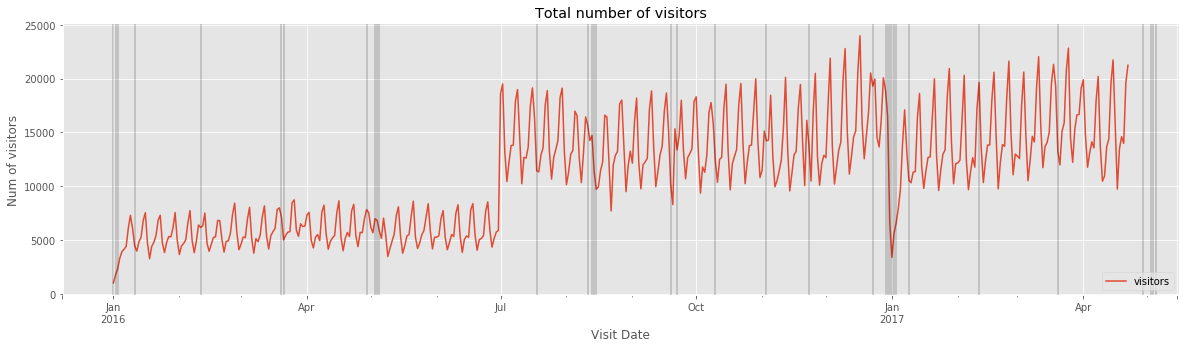

In [10]:
import matplotlib.style as style
style.use('ggplot')
total_visitors_by_date_air["visitors"].plot(figsize=(20,5),legend=True);
for x in hol.query('holiday_flg==1').index:
    _ = plt.axvline(x=x, color='k', alpha = 0.2);
plt.title('Total number of visitors')
plt.legend(loc='lower right')
plt.ylabel('Num of visitors')
plt.xlabel('Visit Date')


**Observations:** 
1) The total number of visitors rise up sharply in July, should explore more about it. This might be related to new restaurants being added to the database. In addition, we already see a periodic pattern that most likely corresponds to a weekly cycle.

2) There is a sharp decrease in 1st Jan 2017 due to the fact of new years eve and being a holiday

In [11]:
air_visit_data['visit_date']=pd.to_datetime(air_visit_data['visit_date'])
air_visit_data['dow'] = air_visit_data['visit_date'].dt.dayofweek

weekly_visits=air_visit_data.groupby(['dow'])
median_num_visitors=weekly_visits['visitors'].agg(np.median)
median_visitors_by_date_air=pd.DataFrame(median_num_visitors)
median_visitors_by_date_air

visitors
dow          
0          14
1          14
2          16
3          16
4          19
5          22
6          19

Text(0.5,0,'Day')

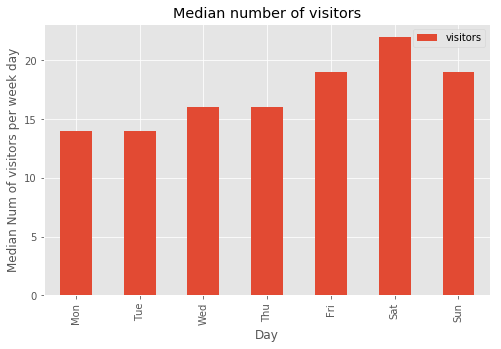

In [12]:
median_visitors_by_date_air.reset_index(inplace=True)
median_visitors_by_date_air['dow']=median_visitors_by_date_air['dow'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

median_visitors_by_date_air.set_index('dow',inplace=True)
median_visitors_by_date_air.plot(figsize=(8,5),kind='bar');
plt.title('Median number of visitors')
plt.legend(loc='upper right')
plt.ylabel('Median Num of visitors per week day')
plt.xlabel('Day')

** Observation:** Friday and the weekend appear to be the most popular days; which is to be expected. Monday and Tuesday have the lowest numbers of average visitors

In [13]:
air_visit_data['visit_date']=pd.to_datetime(air_visit_data['visit_date'])
air_visit_data['month'] = air_visit_data['visit_date'].dt.month
monthly_visits=air_visit_data.groupby(['month'])
med_monthly_num_visitors=monthly_visits['visitors'].agg(np.median)
med_monthly_visitors_by_date_air=pd.DataFrame(med_monthly_num_visitors)
med_monthly_visitors_by_date_air

visitors
month          
1            16
2            17
3            18
4            18
5            18
6            17
7            17
8            16
9            16
10           17
11           16
12           19

Text(0.5,0,'Month')

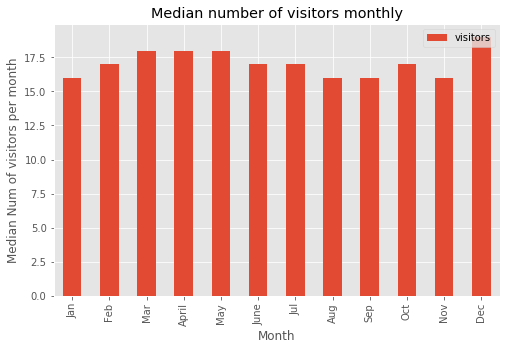

In [14]:
med_monthly_visitors_by_date_air.reset_index(inplace=True)
med_monthly_visitors_by_date_air['month']=med_monthly_visitors_by_date_air['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
med_monthly_visitors_by_date_air.set_index('month',inplace=True)
med_monthly_visitors_by_date_air.plot(figsize=(8,5),kind='bar');
plt.title('Median number of visitors monthly')
plt.legend(loc='upper right')
plt.ylabel('Median Num of visitors per month')
plt.xlabel('Month')

**Observation:** Also during the year there is a certain amount of variation. Dec appears to be the most popular month for restaurant visits. The period of Mar - May is consistently busy

In [15]:
mask = ((air_visit_data['visit_date']>'2016-04-15') & (air_visit_data['visit_date']<'2016-06-15'))
air_visits_temp= air_visit_data.loc[mask]

tmp_visits=air_visits_temp.groupby(['visit_date'])
total_tmp_num_visitors=tmp_visits['visitors'].agg(np.sum)
total_tmp_visitors_by_date_air=pd.DataFrame(total_tmp_num_visitors)
total_tmp_visitors_by_date_air.head()

visitors
visit_date          
2016-04-16      8656
2016-04-17      5253
2016-04-18      4011
2016-04-19      5181
2016-04-20      5706

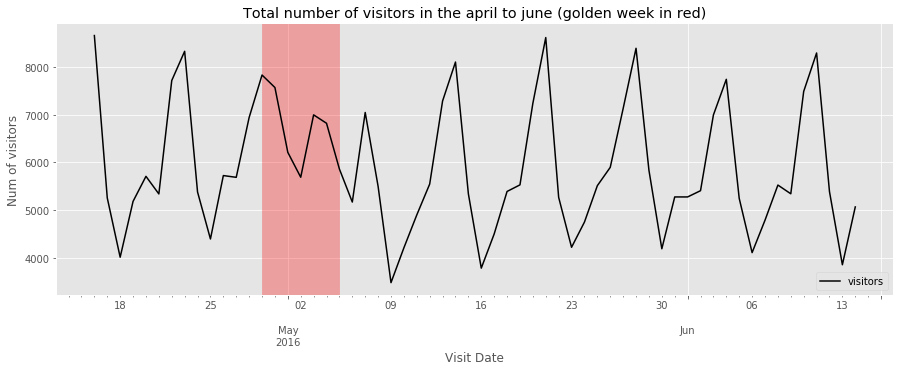

In [16]:
ax=total_tmp_visitors_by_date_air.plot(figsize=(15,5),color="black");
plt.title('Total number of visitors in the april to june (golden week in red)')
plt.legend(loc='lower right')
plt.ylabel('Num of visitors')
plt.xlabel('Visit Date')
ax.axvspan('2016-04-29', '2016-05-05', alpha=0.3, color='red');

** Observation:** We see again the weekly period and also the impact of the aforementioned Golden Week, which in 2016 happened between Apr 29 and May 5

# 3) Exploring air reservation data

In [17]:
air_reserve.head()

air_store_id       visit_datetime     reserve_datetime  \
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00   
1  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   
2  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   
3  air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00   
4  air_db80363d35f10926  2016-01-01 20:00:00  2016-01-01 01:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 6  
3                 2  
4                 5

In [18]:
# air reserve changing the str to datetime and extracting some temporal features
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['visit_date'] = air_reserve['visit_datetime'].dt.date
air_reserve['visit_hour'] = air_reserve['visit_datetime'].dt.hour
air_reserve['visit_dow'] = air_reserve['visit_datetime'].dt.dayofweek

air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime'])
air_reserve['reserve_date'] = air_reserve['reserve_datetime'].dt.date
air_reserve['reserve_hour'] = air_reserve['reserve_datetime'].dt.hour
air_reserve['reserve_dow'] = air_reserve['reserve_datetime'].dt.dayofweek

air_reserve['reserve_datetime_diff_days'] = air_reserve.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)

air_reserve['reserve_datetime_diff_hours']=air_reserve.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).total_seconds()/3600.0, axis=1)

In [19]:
rvisits=air_reserve.groupby(['visit_date'])
total_num_rvisitors=rvisits['reserve_visitors'].agg(np.sum)
total_rvisitors_by_date_air=pd.DataFrame(total_num_rvisitors)
total_rvisitors_by_date_air.head()

reserve_visitors
visit_date                  
2016-01-01                17
2016-01-02               128
2016-01-03                53
2016-01-04               122
2016-01-05                76

Text(0.5,0,'air Visit Date')

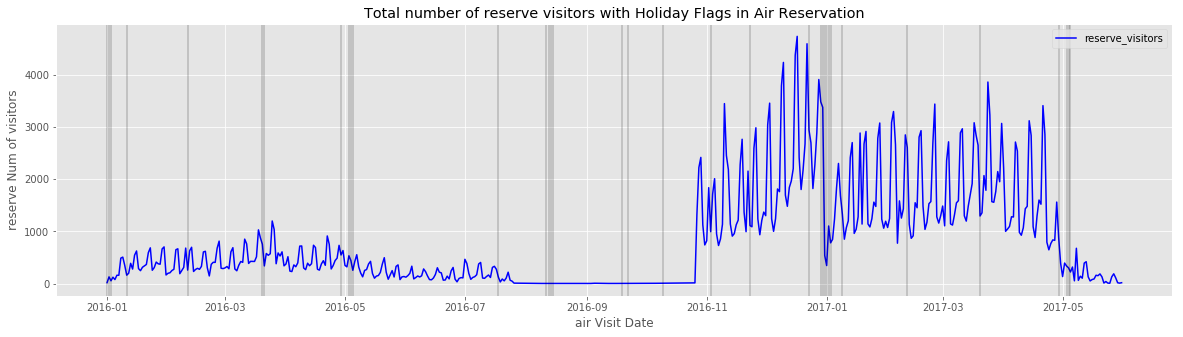

In [20]:
total_rvisitors_by_date_air.plot(figsize=(20,5), color='blue');
for x in hol.query('holiday_flg==1').index:
    _ = plt.axvline(x=x, color='k', alpha = 0.2);
plt.title('Total number of reserve visitors with Holiday Flags in Air Reservation')
plt.legend(loc='upper right')
plt.ylabel('reserve Num of visitors')
plt.xlabel('air Visit Date')

** Observations:**
1) There is a weekly pattern in the resevation as well and there is a flat area in between where the reservations data is not reorded may be due to some technical issues in the air_reservation_system

2) In 2016 the air resevations are much lower and In 2017 the visitor numbers stayed strong. The artifical decline we see after the first quarter is most likely related to these reservations being at the end of the training time frame, which means that long-term reservations would not be part of this data set.

In [20]:
rvisits_hour=air_reserve.groupby(['visit_hour'])
total_num_rvisitors_hour=rvisits_hour['reserve_visitors'].agg(np.sum)
total_rvisitors_hour_by_date_air=pd.DataFrame(total_num_rvisitors_hour)
total_rvisitors_hour_by_date_air.head()

reserve_visitors
visit_hour                  
0                       2758
1                       2190
2                       1218
3                        707
4                        414

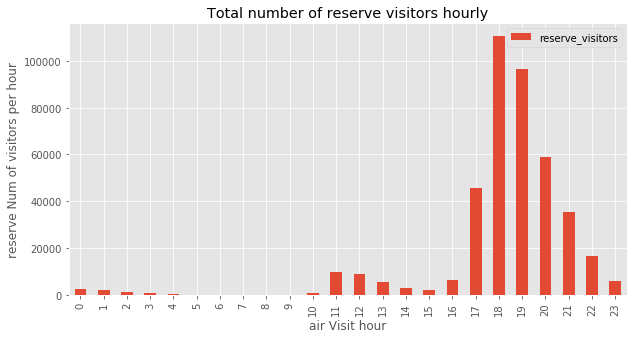

In [21]:
total_rvisitors_hour_by_date_air.plot(figsize=(10,5),kind='bar');
plt.title('Total number of reserve visitors hourly')
plt.legend(loc='upper right')
plt.ylabel('reserve Num of visitors per hour')
plt.xlabel('air Visit hour');

**Observation:** Reservations are made typically for the dinner hours in the evening

In [22]:
mask = ((air_reserve['reserve_datetime_diff_hours']<24*5))
air_reserve_temp= air_reserve.loc[mask]

reserve_dff=air_reserve_temp.groupby(['reserve_datetime_diff_hours'])
total_reserve_dff=reserve_dff['reserve_visitors'].agg(np.sum)

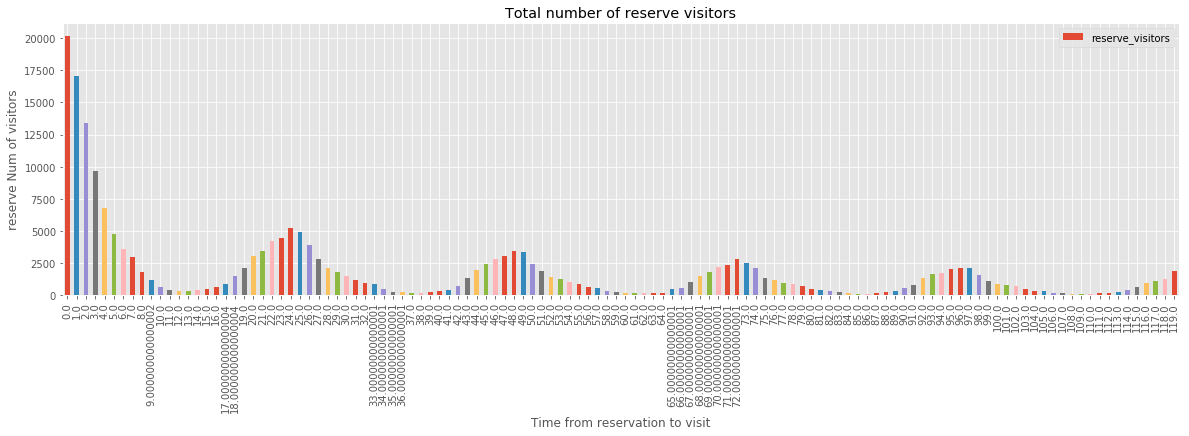

In [23]:
total_reserve_dff.plot(figsize=(20,5),kind='bar',color='red');
plt.title('Total number of AIR reserve visitors')
plt.legend(loc='upper right')
plt.ylabel('reserve Num of visitors')
plt.xlabel('Time from reservation to visit');

**Observation:** The time, here shown in hours, between making a reservation and visiting the restaurant follow a nice 24-hour pattern. The most popular strategy is to reserve a couple of hours before the visit, but if the reservation is made more in advance then it seems to be common to book a table in the evening for one of the next evenings. This plot is truncated to show this pattern, which continues towards longer time scales. Very long time gaps between reservation and visit are not uncommon. Those are the most extreme values for the air data, up to more than a year in advance

# 4) Exploring the hpg reservation data

In [24]:
hpg_reserve.head()

hpg_store_id       visit_datetime     reserve_datetime  \
0  hpg_c63f6f42e088e50f  2016-01-01 11:00:00  2016-01-01 09:00:00   
1  hpg_dac72789163a3f47  2016-01-01 13:00:00  2016-01-01 06:00:00   
2  hpg_c8e24dcf51ca1eb5  2016-01-01 16:00:00  2016-01-01 14:00:00   
3  hpg_24bb207e5fd49d4a  2016-01-01 17:00:00  2016-01-01 11:00:00   
4  hpg_25291c542ebb3bc2  2016-01-01 17:00:00  2016-01-01 03:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 2  
3                 5  
4                13

In [25]:
hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['visit_date'] = hpg_reserve['visit_datetime'].dt.date
hpg_reserve['visit_hour'] = hpg_reserve['visit_datetime'].dt.hour
hpg_reserve['visit_dow'] = hpg_reserve['visit_datetime'].dt.dayofweek

hpg_reserve['reserve_datetime'] = pd.to_datetime(hpg_reserve['reserve_datetime'])
hpg_reserve['reserve_date'] = hpg_reserve['reserve_datetime'].dt.date
hpg_reserve['reserve_hour'] = hpg_reserve['reserve_datetime'].dt.hour
hpg_reserve['reserve_dow'] = hpg_reserve['reserve_datetime'].dt.dayofweek

hpg_reserve['reserve_datetime_diff_days'] = hpg_reserve.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)
hpg_reserve['reserve_datetime_diff_hours']=hpg_reserve.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).total_seconds()/3600.0, axis=1)

In [26]:
rvisits=hpg_reserve.groupby(['visit_date'])
total_num_rvisitors=rvisits['reserve_visitors'].agg(np.sum)
total_rvisitors_by_date_hpg=pd.DataFrame(total_num_rvisitors)
total_rvisitors_by_date_hpg.head()

reserve_visitors
visit_date                  
2016-01-01               493
2016-01-02              3089
2016-01-03              3223
2016-01-04              2834
2016-01-05              2796

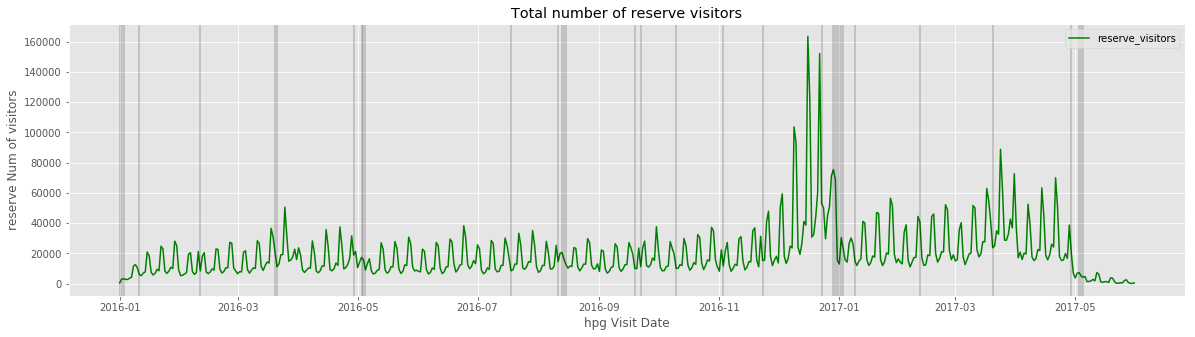

In [27]:
total_rvisitors_by_date_hpg.plot(figsize=(20,5),color='green');
for x in hol.query('holiday_flg==1').index:
    _ = plt.axvline(x=x, color='k', alpha = 0.2);
plt.title('Total number of reserve visitors in HPG Reservations')
plt.legend(loc='upper right')
plt.ylabel('reserve Num of visitors')
plt.xlabel('hpg Visit Date');

**Observations:**
1) Here the visits after reservation follow a more orderly pattern, with a clear spike in Dec 2016 during christmas week and last week of december. As above for the air data, we also see reservation visits dropping off as we get closer to the end of the time frame
2) The holidays also play some role in the reservations when the restaurants are closed

In [28]:
rvisits_hour=hpg_reserve.groupby(['visit_hour'])
total_num_rvisitors_hour=rvisits_hour['reserve_visitors'].agg(np.sum)
total_rvisitors_hour_by_date_hpg=pd.DataFrame(total_num_rvisitors_hour)
total_rvisitors_hour_by_date_hpg.head()

reserve_visitors
visit_hour                  
0                      12443
1                       8113
2                       2948
3                       1022
4                        875

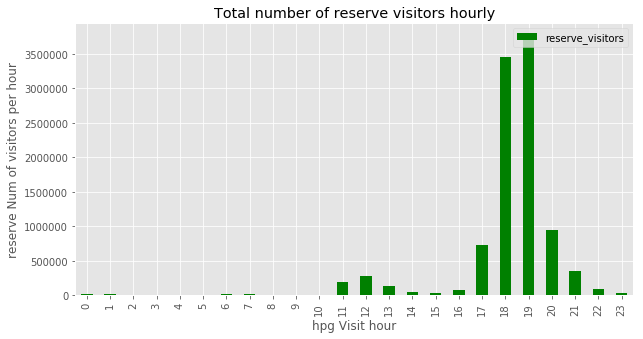

In [29]:
total_rvisitors_hour_by_date_hpg.plot(figsize=(10,5),kind='bar',color='green');
plt.title('Total number of reserve visitors hourly')
plt.legend(loc='upper right')
plt.ylabel('reserve Num of visitors per hour')
plt.xlabel('hpg Visit hour');

In [30]:
mask = ((hpg_reserve['reserve_datetime_diff_hours']<24*5))
hpg_reserve_temp= hpg_reserve.loc[mask]

reserve_dff=hpg_reserve_temp.groupby(['reserve_datetime_diff_hours'])
total_reserve_dff=reserve_dff['reserve_visitors'].agg(np.sum)

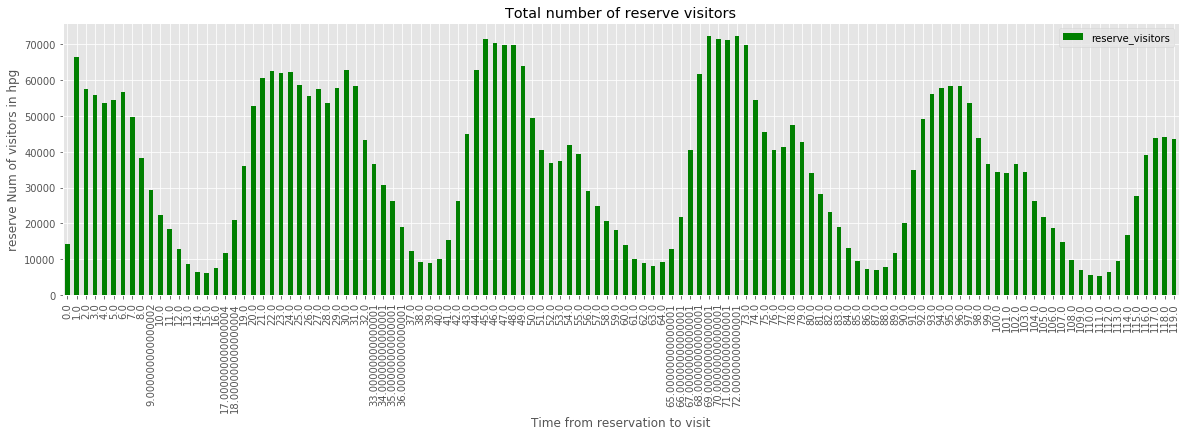

In [31]:
total_reserve_dff.plot(figsize=(20,5),kind='bar',color='green');
plt.title('Total number of HPG reserve visitors')
plt.legend(loc='upper right')
plt.ylabel('reserve Num of visitors in hpg')
plt.xlabel('Time from reservation to visit');

**Observation:** Again, most reservations are for dinner, and we see another nice 24-hour pattern for making these reservations. It’s worth noting that here the last few hours before the visit don’t see more volume than the 24 or 48 hours before. This is in stark constrast to the air data

# 5) Exploring the air store inforamtion

In [32]:
air_store_info.head()

air_store_id  air_genre_name                 air_area_name  \
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen   

    latitude   longitude  
0  34.695124  135.197852  
1  34.695124  135.197852  
2  34.695124  135.197852  
3  34.695124  135.197852  
4  35.658068  139.751599

In [33]:
import folium; my_map=folium.Map(location=(36.2048, 138.2529), zoom_start=5,tiles='cartodbpositron')#,tiles="Mapbox Control Room"
from folium.plugins import MarkerCluster
lat1=list(air_store_info["latitude"])
lon1=list(air_store_info["longitude"])
airid=list(air_store_info['air_store_id'])
airgname=list(air_store_info['air_genre_name'])
fgv=folium.FeatureGroup(name="restaurants")

marker_cluster = MarkerCluster()


for lt,ln,air,name in zip(lat1,lon1,airid,airgname):
    marker_g=(folium.Marker(location=[lt,ln],popup=str(air)+' '+str(name),icon = folium.Icon(color='blue')))
    marker_cluster.add_child(marker_g)
fgv.add_child(marker_cluster)
my_map.add_child(fgv)

my_map.add_child(folium.LayerControl())


In [34]:
genres=air_store_info.groupby(['air_genre_name'])
total_num_restaurants_genre=genres['air_store_id'].count()
total_num_restaurants_genre_air=pd.DataFrame(total_num_restaurants_genre)
total_num_restaurants_genre_air.sort_values(by='air_store_id',ascending=False,inplace=True)
total_num_restaurants_genre_air.head()

air_store_id
air_genre_name              
Izakaya                  197
Cafe/Sweets              181
Dining bar               108
Italian/French           102
Bar/Cocktail              79

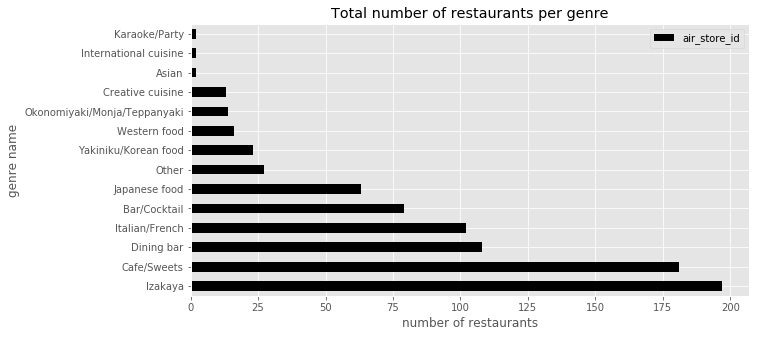

In [35]:
total_num_restaurants_genre_air.plot(figsize=(10,5),kind='barh',color='black');
plt.title('Total number of restaurants per genre')
plt.legend(loc='upper right')
plt.xlabel('number of restaurants')
plt.ylabel('genre name');

In [36]:
areas=air_store_info.groupby(['air_area_name'])
total_num_restaurants_area=areas['air_store_id'].count()
total_num_restaurants_area_air=pd.DataFrame(total_num_restaurants_area)
total_num_restaurants_area_air.sort_values(by='air_store_id',ascending=False,inplace=True)
total_num_restaurants_area_air.head()

air_store_id
air_area_name                               
Fukuoka-ken Fukuoka-shi Daimyō            64
Tōkyō-to Shibuya-ku Shibuya               58
Tōkyō-to Minato-ku Shibakōen              51
Tōkyō-to Shinjuku-ku Kabukichō            39
Tōkyō-to Setagaya-ku Setagaya             30

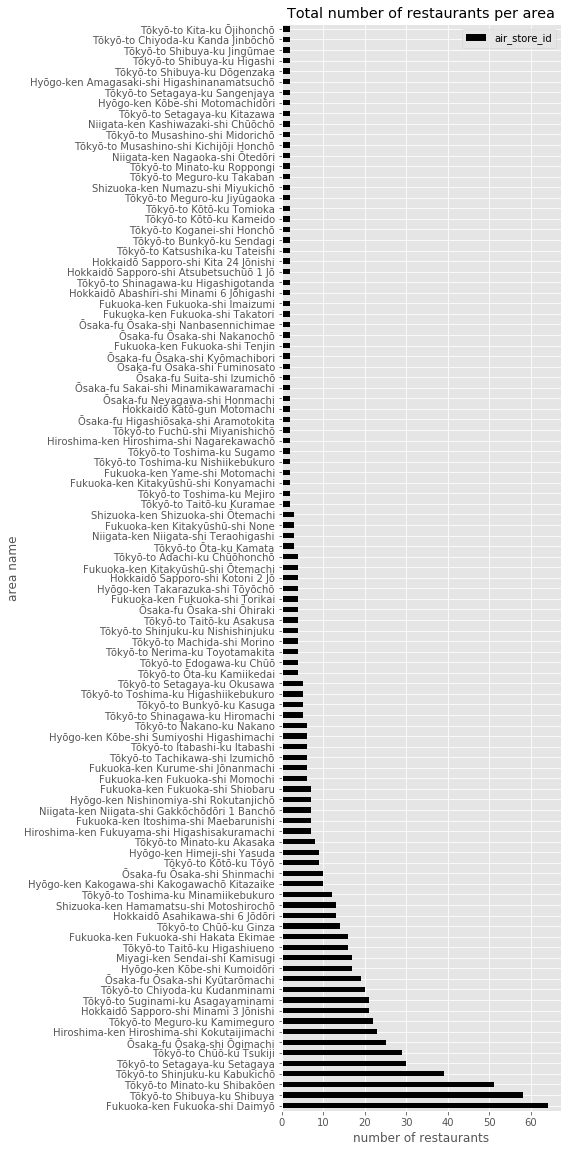

In [37]:
total_num_restaurants_area_air.plot(figsize=(5,20),kind='barh',color='black');
plt.title('Total number of restaurants per area')
plt.legend(loc='upper right')
plt.xlabel('number of restaurants')
plt.ylabel('area name');

**Observations:** 
1) There are lots of Izakaya gastropubs in our data, followed by Cafe’s. We don’t have many Karaoke places in the air data set and also only a few that describe themselves as generically “International” or “Asian”.
2) Fukuoka has the largest number of air restaurants per area, followed by many Tokyo areas

# 6) Exploring the hpg store information

In [38]:
hpg_store_info=pd.read_csv('hpg_store_info.csv')

In [39]:
hpg_store_info.head()

hpg_store_id  hpg_genre_name                  hpg_area_name  \
0  hpg_6622b62385aec8bf  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
1  hpg_e9e068dd49c5fa00  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
2  hpg_2976f7acb4b3a3bc  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
3  hpg_e51a522e098f024c  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
4  hpg_e3d0e1519894f275  Japanese style  Tōkyō-to Setagaya-ku Taishidō   

    latitude   longitude  
0  35.643675  139.668221  
1  35.643675  139.668221  
2  35.643675  139.668221  
3  35.643675  139.668221  
4  35.643675  139.668221

In [40]:
import folium

locationlist = hpg_store_info[["latitude","longitude"]].values.tolist()
marker_cluster2 = MarkerCluster()
m = folium.Map(location=(36.2048, 138.2529), zoom_start=5,tiles='cartodbpositron')
for point in range(len(locationlist)):
    #popup = folium.Popup(labels[point], parse_html=True)
    marker_g=folium.Marker(locationlist[point]) #popup=popup not working because of complex characters i guess
    marker_cluster2.add_child(marker_g)
marker_cluster2.add_to(m)
m

In [41]:
genres=hpg_store_info.groupby(['hpg_genre_name'])
total_num_restaurants_genre=genres['hpg_store_id'].count()
total_num_restaurants_genre_hpg=pd.DataFrame(total_num_restaurants_genre)
total_num_restaurants_genre_hpg.sort_values(by='hpg_store_id',ascending=False,inplace=True)
total_num_restaurants_genre_hpg.head()

hpg_store_id
hpg_genre_name                     
Japanese style                 1750
International cuisine           700
Creation                        410
Seafood                         339
Grilled meat                    325

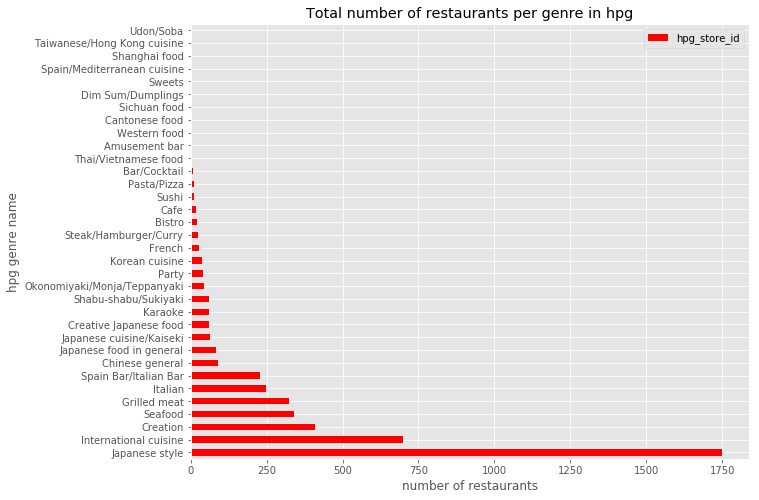

In [42]:
total_num_restaurants_genre_hpg.plot(figsize=(10,8),kind='barh',color='red');
plt.title('Total number of restaurants per genre in hpg')
plt.legend(loc='upper right')
plt.xlabel('number of restaurants')
plt.ylabel('hpg genre name');

In [43]:
areas=hpg_store_info.groupby(['hpg_area_name'])
total_num_restaurants_area=areas['hpg_store_id'].count()
total_num_restaurants_area_hpg=pd.DataFrame(total_num_restaurants_area)
total_num_restaurants_area_hpg.sort_values(by='hpg_store_id',ascending=False,inplace=True)
total_num_restaurants_area_hpg.head()

hpg_store_id
hpg_area_name                                    
Tōkyō-to Shinjuku-ku None                     257
Tōkyō-to Chūō-ku Ginza                        198
Hyōgo-ken Kōbe-shi None                       163
Ōsaka-fu Ōsaka-shi Shinsaibashisuji           150
Osaka Prefecture Osaka None                   145

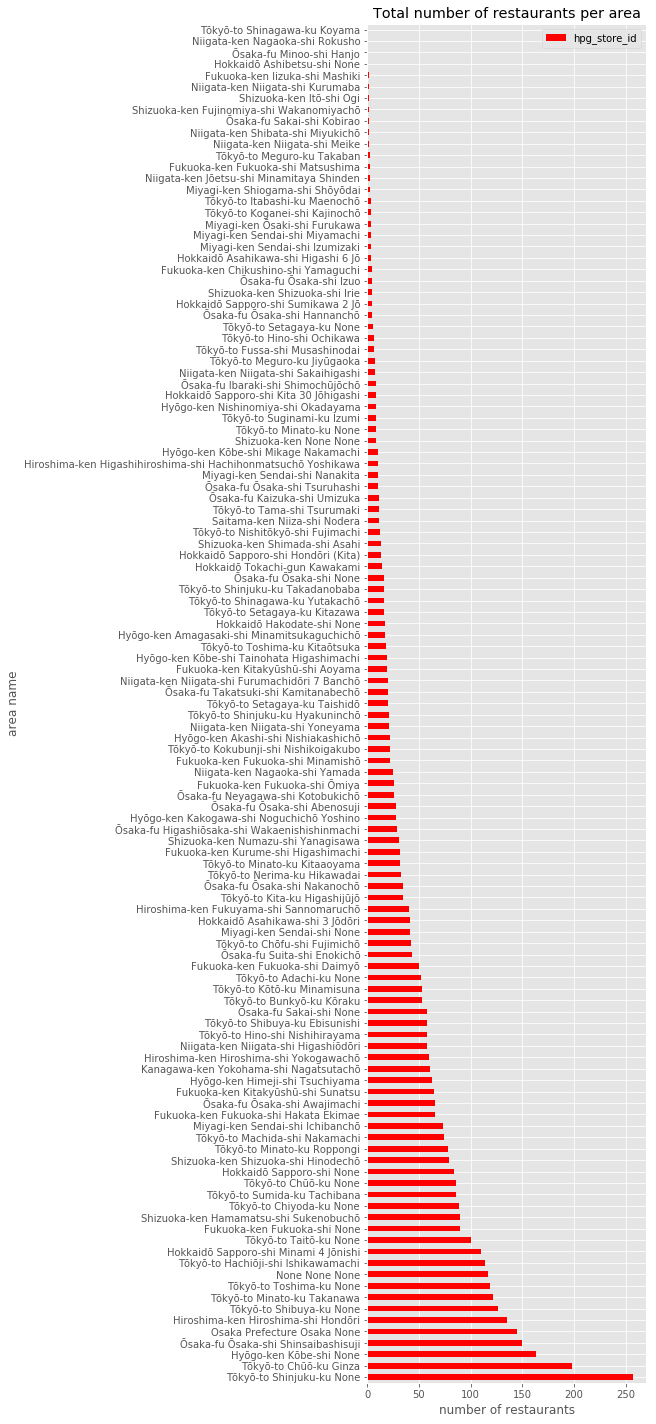

In [44]:
total_num_restaurants_area_hpg.plot(figsize=(5,25),kind='barh',color='red');
plt.title('Total number of restaurants per area')
plt.legend(loc='upper right')
plt.xlabel('number of restaurants')
plt.ylabel('area name');

**Observations:** 
1) The hpg description contains a larger variety of genres than in the air data. Here, “Japanese style” appears to contain many more places that are categorised more specifically in the air data. The same applies to “International cuisine”.

2) In the top 15 area we find again Tokyo and Osaka to be prominently present.

# 7) Exploring the Date information

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


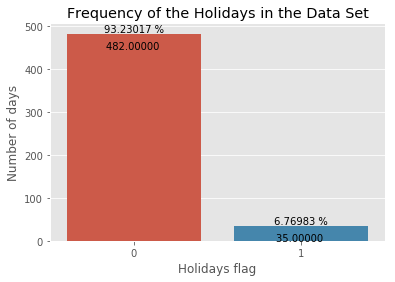

In [45]:
ax=sns.countplot(x="holiday_flg", data=date_info);
total=float(len(date_info))
plt.title('Frequency of the Holidays in the Data Set')
plt.ylabel('Number of days')
plt.xlabel('Holidays flag')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.5f} %'.format(height*100/total),ha="center")
    ax.text(p.get_x()+p.get_width()/2.,height - 35,'{:1.5f} '.format(height),ha="center")

In [46]:
date_info['calendar_date']=pd.to_datetime(date_info['calendar_date'])
mask = ((date_info['calendar_date']>'2016-04-15') & (date_info['calendar_date']<'2016-06-1'))
holidays_temp= date_info.loc[mask]

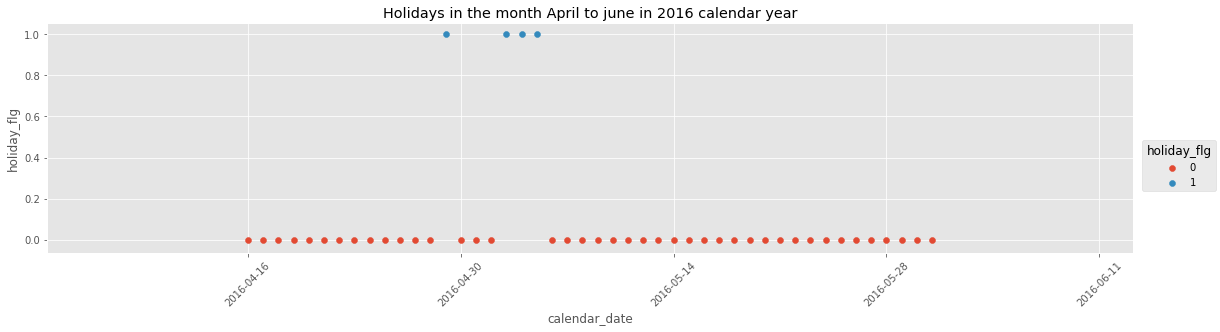

In [47]:
ax=sns.FacetGrid(holidays_temp, hue="holiday_flg",size=(4),aspect=4).map(plt.scatter, "calendar_date", "holiday_flg").add_legend()
ax.set_xticklabels(rotation=45)
plt.title('Holidays in the month April to june in 2016 calendar year');

In [48]:
date_info['calendar_date']=pd.to_datetime(date_info['calendar_date'])
mask = ((date_info['calendar_date']>'2017-04-15') & (date_info['calendar_date']<'2017-06-1'))
holidays_temp= date_info.loc[mask]

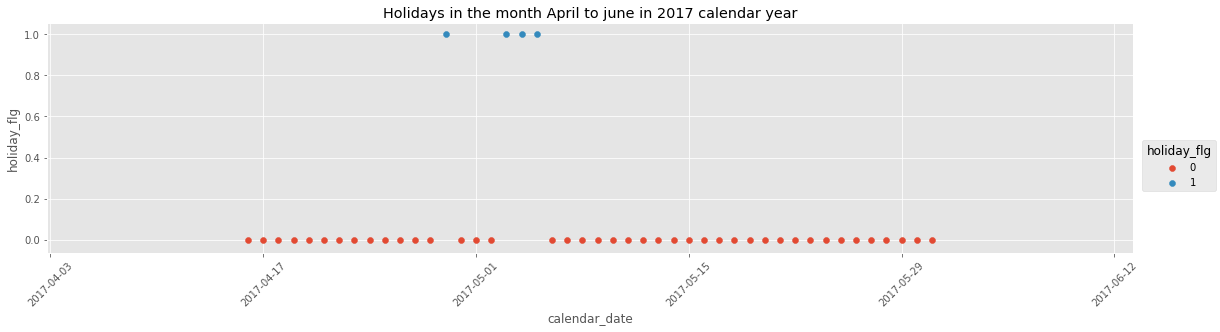

In [49]:
ax=sns.FacetGrid(holidays_temp, hue="holiday_flg",size=(4),aspect=4).map(plt.scatter, "calendar_date", "holiday_flg").add_legend()
ax.set_xticklabels(rotation=45)
plt.title('Holidays in the month April to june in 2017 calendar year');

** Observation:** The same days were holidays in late Apr / May in 2016 as in 2017.

There are about 7% holidays in our data:

# 8) Combining Data frames

In [132]:
df_air_reserve = air_reserve.copy()
df_air_store = air_store_info.copy()
df_air_visit = air_visit_data.copy()
df_hpg_reserve = hpg_reserve.copy()
df_hpg_store = hpg_store_info.copy()
df_date_info = pd.read_csv('date_info.csv')
df_store_id_rel = store_id_relation.copy()

## 8.0) Data Wrangling

In [125]:
# merge 'air' tables and bring over any 'hpg' store data
df_air_merged = df_air_reserve.merge(df_air_store,on='air_store_id', how='left').merge(
    df_store_id_rel, on='air_store_id', how='left').merge(df_hpg_store,on='hpg_store_id', how='left',suffixes=('_air','_hpg'))

In [126]:
# merge 'hpg' tables and bring over any 'air' store data
df_hpg_merged = df_hpg_reserve.merge(df_hpg_store,on='hpg_store_id', how='left').merge(
    df_store_id_rel,on='hpg_store_id', how='left').merge(df_air_store,on='air_store_id', how='left',suffixes=('_hpg','_air'))

In [127]:
# add source column
df_air_merged['source'] = 'air'
df_hpg_merged['source'] = 'hpg'

In [128]:
# append tables together
df_res_merged = df_air_merged.append(df_hpg_merged)
df_res_merged.reset_index(inplace=True)

In [129]:
# format date fields
df_res_merged['visit_datetime'] = pd.to_datetime(df_res_merged.visit_datetime)
df_res_merged['reserve_datetime'] = pd.to_datetime(df_res_merged.reserve_datetime)

df_res_merged['calendar_date'] = df_res_merged.visit_datetime.dt.date
df_res_merged['visit_time'] = df_res_merged.visit_datetime.dt.time
df_res_merged['reserve_date'] = df_res_merged.reserve_datetime.dt.date
df_res_merged['reserve_time'] = df_res_merged.reserve_datetime.dt.time

In [130]:
# add month, year, and season
df_res_merged['visit_month'] = df_res_merged.visit_datetime.apply(lambda x: x.strftime("%b"))
df_res_merged['visit_year'] = df_res_merged.visit_datetime.apply(lambda x: x.strftime("%Y"))
df_res_merged['reserve_month'] = df_res_merged.reserve_datetime.apply(lambda x: x.strftime("%b"))
df_res_merged['reserve_year'] = df_res_merged.reserve_datetime.apply(lambda x: x.strftime("%Y"))

seasons = {'Jan': 'Winter','Feb': 'Winter','Mar': 'Spring','Apr': 'Spring','May': 'Spring','Jun': 'Summer',
           'Jul': 'Summer','Aug': 'Summer','Sep': 'Autumn','Oct': 'Autumn','Nov': 'Autumn','Dec': 'Winter'}

df_res_merged['reserve_season'] = df_res_merged['reserve_month'].map(seasons)
df_res_merged['visit_season'] = df_res_merged['visit_month'].map(seasons)

In [133]:
# format df_date_info date to merge
df_date_info['calendar_date'] = pd.to_datetime(df_date_info.calendar_date)
df_date_info['calendar_date'] = df_date_info.calendar_date.dt.date
df_res_merged = df_res_merged.merge(df_date_info, on='calendar_date', how='left')
df_res_merged.rename(columns={"day_of_week": "day_of_week_visit", "holiday_flg": "holiday_flag_visit"}, inplace=True)
df_date_info.rename(columns={"calendar_date": "reserve_date"}, inplace=True)
df_res_merged = df_res_merged.merge(df_date_info, on='reserve_date', how='left')
df_res_merged.rename(columns={"day_of_week": "day_of_week_res", "holiday_flg": "holiday_flag_res"}, inplace=True)

In [134]:
# time between reservation and visit
df_res_merged['res_vs_visit'] = df_res_merged['visit_datetime'] - df_res_merged['reserve_datetime']
df_res_merged['res_vs_visit_days'] = df_res_merged['res_vs_visit'].astype('timedelta64[D]')
df_res_merged['res_vs_visit_hours'] = df_res_merged['res_vs_visit'].astype('timedelta64[h]')

In [135]:
# holiday the day before and after visit
df_res_merged['holiday_before_visit'] = df_res_merged.holiday_flag_visit.shift(1)
df_res_merged.holiday_before_visit.fillna(0,inplace=True)
df_res_merged['holiday_after_visit'] = df_res_merged.holiday_flag_visit.shift(-1)
df_res_merged.holiday_after_visit.fillna(0,inplace=True)

In [136]:
df_res_merged.describe()

index   latitude_air   latitude_hpg  longitude_air  \
count  2.092698e+06  120561.000000  887462.000000  120561.000000   
mean   9.580483e+05      36.252175      35.884948     137.102875   
std    5.976220e+05       3.000747       2.304317       3.828885   
min    0.000000e+00      33.211967      33.311645     130.348436   
25%    4.307962e+05      34.681261      34.692109     134.685353   
50%    9.539705e+05      35.629564      35.648231     139.036327   
75%    1.477145e+06      35.694003      35.704527     139.753595   
max    2.000319e+06      44.020632      43.774846     144.273398   

       longitude_hpg  reserve_datetime_diff_days  reserve_datetime_diff_hours  \
count  887462.000000                2.092698e+06                 2.092698e+06   
mean      137.494885                7.047500e+00                 1.798449e+02   
std         3.311023                1.015487e+01                 2.437653e+02   
min       130.339313                0.000000e+00                 0.000000e+00   
25%       135.495215                1.000000e+00                 4.400000e+01   
50%       139.373870                4.000000e+00                 1.010000e+02   
75%       139.737998                9.000000e+00                 2.350000e+02   
max       143.714585                3.930000e+02                 9.435000e+03   

        reserve_dow  reserve_hour  reserve_visitors     visit_dow  \
count  2.092698e+06  2.092698e+06      2.092698e+06  2.092698e+06   
mean   2.789715e+00  1.536544e+01      5.047650e+00  3.527480e+00   
std    1.919252e+00  5.753291e+00      5.396588e+00  1.780394e+00   
min    0.000000e+00  0.000000e+00      1.000000e+00  0.000000e+00   
25%    1.000000e+00  1.200000e+01      2.000000e+00  2.000000e+00   
50%    3.000000e+00  1.600000e+01      3.000000e+00  4.000000e+00   
75%    4.000000e+00  2.000000e+01      6.000000e+00  5.000000e+00   
max    6.000000e+00  2.300000e+01      1.000000e+02  6.000000e+00   

         visit_hour  holiday_flag_visit  holiday_flag_res  \
count  2.092698e+06        2.092698e+06      2.092698e+06   
mean   1.798586e+01        7.136195e-02      5.241798e-02   
std    2.425937e+00        2.574285e-01      2.228685e-01   
min    0.000000e+00        0.000000e+00      0.000000e+00   
25%    1.800000e+01        0.000000e+00      0.000000e+00   
50%    1.800000e+01        0.000000e+00      0.000000e+00   
75%    1.900000e+01        0.000000e+00      0.000000e+00   
max    2.300000e+01        1.000000e+00      1.000000e+00   

                  res_vs_visit  res_vs_visit_days  res_vs_visit_hours  \
count                  2092698       2.092698e+06        2.092698e+06   
mean    7 days 11:50:41.597784       7.047500e+00        1.798449e+02   
std    10 days 03:45:54.951205       1.015487e+01        2.437653e+02   
min            0 days 00:00:00       0.000000e+00        0.000000e+00   
25%            1 days 20:00:00       1.000000e+00        4.400000e+01   
50%            4 days 05:00:00       4.000000e+00        1.010000e+02   
75%            9 days 19:00:00       9.000000e+00        2.350000e+02   
max          393 days 03:00:00       3.930000e+02        9.435000e+03   

       holiday_before_visit  holiday_after_visit  
count          2.092698e+06         2.092698e+06  
mean           7.136195e-02         7.136147e-02  
std            2.574285e-01         2.574277e-01  
min            0.000000e+00         0.000000e+00  
25%            0.000000e+00         0.000000e+00  
50%            0.000000e+00         0.000000e+00  
75%            0.000000e+00         0.000000e+00  
max            1.000000e+00         1.000000e+00

## 8.1) Air visit data with air store information

In [50]:
air_visits_store=pd.merge(air_visit_data,air_store_info,on='air_store_id',how='left')

air_visits_store.head()

air_store_id visit_date  visitors  dow  month air_genre_name  \
0  air_ba937bf13d40fb24 2016-01-13        25    2      1     Dining bar   
1  air_ba937bf13d40fb24 2016-01-14        32    3      1     Dining bar   
2  air_ba937bf13d40fb24 2016-01-15        29    4      1     Dining bar   
3  air_ba937bf13d40fb24 2016-01-16        22    5      1     Dining bar   
4  air_ba937bf13d40fb24 2016-01-18         6    0      1     Dining bar   

                  air_area_name   latitude   longitude  
0  Tōkyō-to Minato-ku Shibakōen  35.658068  139.751599  
1  Tōkyō-to Minato-ku Shibakōen  35.658068  139.751599  
2  Tōkyō-to Minato-ku Shibakōen  35.658068  139.751599  
3  Tōkyō-to Minato-ku Shibakōen  35.658068  139.751599  
4  Tōkyō-to Minato-ku Shibakōen  35.658068  139.751599

In [51]:
air_visits_store_temp=air_visits_store.groupby(['visit_date','air_genre_name'])
air_visits_store_temp=air_visits_store_temp['visitors'].agg(np.mean)
air_visits_store_temp=pd.DataFrame(air_visits_store_temp)
air_visits_store_temp.reset_index(inplace=True)
air_visits_store_temp['visitors']=np.log(air_visits_store_temp['visitors'])

In [52]:
genres = {
    'Japanese style':'Japanese',
    'International cuisine':'Other',
    'Grilled meat':'Other Asian',
    'Creation':'Japanese',
    'Italian':'European',
    'Seafood':'Other',
    'Spain Bar/Italian Bar':'European',
    'Japanese food in general':'Japanese',
    'Shabu-shabu/Sukiyaki':'Japanese',
    'Chinese general':'Other Asian',
    'Creative Japanese food':'Japanese',
    'Japanese cuisine/Kaiseki':'Japanese',
    'Korean cuisine':'Other Asian',
    'Okonomiyaki/Monja/Teppanyaki':'Japanese',
    'Karaoke':'Bar or Club',
    'Steak/Hamburger/Curry':'Other',
    'French':'European',
    'Cafe':'European',
    'Bistro':'Other',
    'Sushi':'Japanese',
    'Party':'Bar or Club',
    'Western food':'Other',
    'Pasta/Pizza':'Other',
    'Thai/Vietnamese food':'Other Asian',
    'Bar/Cocktail':'Bar or Club',
    'Amusement bar':'Bar or Club',
    'Cantonese food':'Other Asian',
    'Dim Sum/Dumplings':'Other Asian',
    'Sichuan food':'Other Asian',
    'Sweets':'Other',
    'Spain/Mediterranean cuisine':'European',
    'Udon/Soba':'Japanese',
    'Shanghai food':'Other Asian',
    'Taiwanese/Hong Kong cuisine':'Other Asian',
    'Japanese food':'Japanese', 
    'Dining bar':'Bar or Club', 
    'Izakaya':'Japanese',
    'Okonomiyaki/Monja/Teppanyaki':'Japanese', 
    'Italian/French':'European', 
    'Cafe/Sweets':'Other',
    'Yakiniku/Korean food':'Other Asian', 
    'Western food':'Other', 
    'Bar/Cocktail':'Bar or Club', 
    'Other':'Other',
    'Creative cuisine':'Japanese', 
    'Karaoke/Party':'Bar or Club', 
    'International cuisine':'Other',
    'Asian':'Other Asian',
    'None':'None',
    'No Data':'No Data'}

In [53]:
air_visits_store_temp['air_genre_2'] = air_visits_store_temp['air_genre_name'].map(genres)

In [160]:
# format df_date_info and add month, year, and season
# some extra data wrangling
df_air_visit['visit_date'] = pd.to_datetime(df_air_visit.visit_date)
df_air_visit['visit_date'] = df_air_visit.visit_date.dt.date
df_air_visit = df_air_visit.merge(df_date_info, left_on='visit_date', right_on='reserve_date', how='left')
df_air_visit.drop('reserve_date', axis=1, inplace=True)
df_air_visit = df_air_visit.merge(df_air_store,on='air_store_id', how='left')
df_air_visit['visit_month'] = df_air_visit.visit_date.apply(lambda x: x.strftime("%b"))
df_air_visit['visit_year'] = df_air_visit.visit_date.apply(lambda x: x.strftime("%Y"))
df_air_visit['visit_season'] = df_air_visit['visit_month'].map(seasons)

df_air_visit.air_genre_name.fillna('No Data', inplace=True)
df_air_visit['air_genre_2'] = df_air_visit['air_genre_name'].map(genres)

df_air_visit['holiday_before_visit'] = df_air_visit.holiday_flg.shift(1)
df_air_visit.holiday_before_visit.fillna(0,inplace=True)
df_air_visit['holiday_after_visit'] = df_air_visit.holiday_flg.shift(-1)
df_air_visit.holiday_after_visit.fillna(0,inplace=True)



Text(0.5,0.98,'Daily visitors per genre')

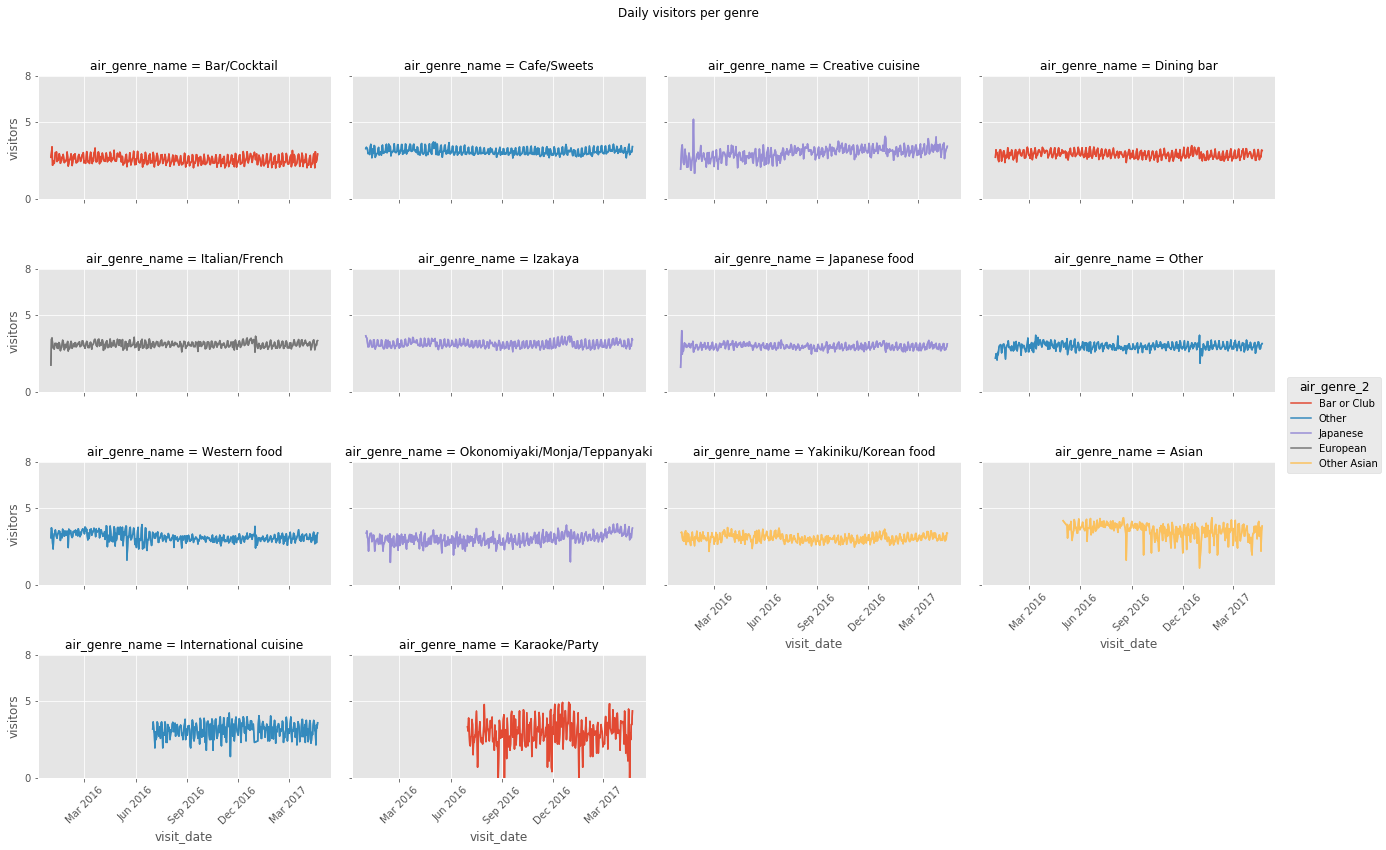

In [161]:
import matplotlib.dates as mdates
plt.style.use('ggplot')
g = sns.FacetGrid(air_visits_store_temp, col="air_genre_name",hue='air_genre_2',col_wrap=4,aspect=1.5)
g = g.map(plt.plot, "visit_date","visitors").set(ylim=(0,8),yticks=[0,5,8])
g.set_xticklabels(rotation=45);
for q in g.axes:
    q.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    q.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
g.map(plt.plot, "visit_date", "visitors")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Daily visitors per genre')

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0.98,'Mean visitors per day by genre')

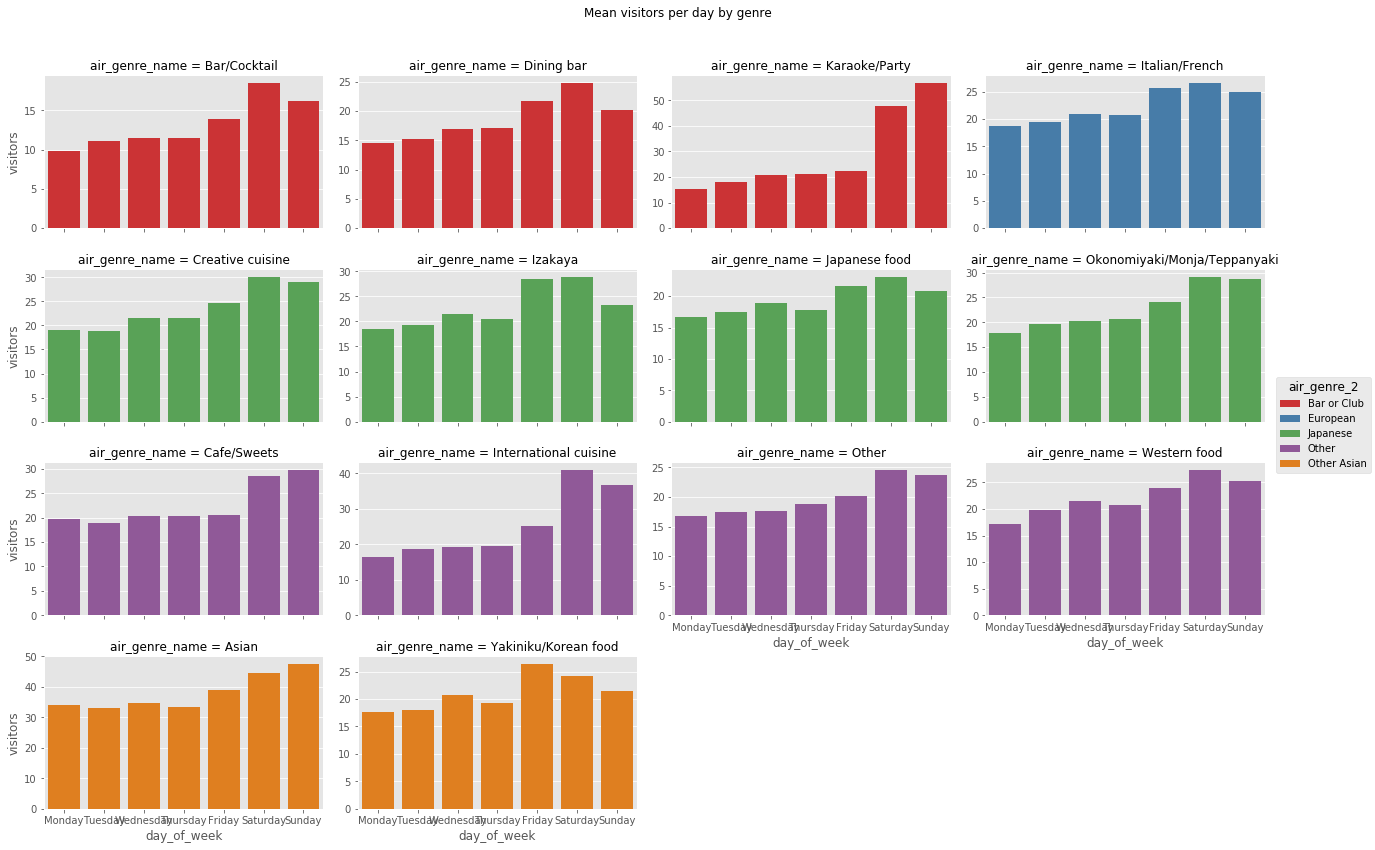

In [163]:
dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

df_air_visit['visit_date']= df_air_visit.visit_date.apply(lambda x: pd.to_datetime(x).date())
df_visitors_by_genre = df_air_visit.groupby(['air_genre_2','air_genre_name','day_of_week']) \
                             .agg({'visitors':'mean'}) \
                             .reset_index() 

g = sns.FacetGrid(df_visitors_by_genre, col="air_genre_name", col_wrap=4, sharey=False,
                  hue='air_genre_2',aspect=1.5,palette='Set1')
g.map(sns.barplot, "day_of_week", "visitors",order=dow)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean visitors per day by genre')

**Observation:** 
1) The mean values range between 10 and 100 visitors per genre per day. Within each category, the long-term trend looks reasonably stable. There is an upward trend for “Creative Cuisine” and “Okonomiyaki” et al., while the popularity of “Asian” food has been declining since late 2016.

2) The low-count time series like “Karaoke” or “Asian” are understandably more noisy than the genres with higher numbers of visitors. Still, “Asian” restaurants appear to be very popular despite (or because of?) their rarity.

3) Some genres dont appear until later in the data set ie/ International cuisine, Karaoke/Party, and Asian. Karaoke/Party and International cuisine coincide with the data volume jump observed in July 2016. Asian appears slightly before that.

4) Okonomiyaki (and to a lesser extent Yakiniku) shows a trend upwards compared to others

5) Demand for some genres remain pretty consistent throughout the weekly cycle. Demand for Karaoke/Party venues fluctuates wildly over the time period.

6) Karaoke/Party is pretty dead during the week (and even Friday) but very popular on the weekend, especially Sunday.

In [55]:
air_visits_store['dow']=air_visits_store['visit_date'].dt.dayofweek
air_visits_store_temp_wday=air_visits_store.groupby(['dow','air_genre_name'])
air_visits_store_temp_wday=air_visits_store_temp_wday['visitors'].agg(np.mean)
air_visits_store_temp_wday=pd.DataFrame(air_visits_store_temp_wday)
air_visits_store_temp_wday.reset_index(inplace=True)

In [56]:
air_visits_store_temp_wday['dow']=air_visits_store_temp_wday['dow'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [57]:
air_visits_store_temp_wday.head()

dow    air_genre_name   visitors
0  Mon             Asian  33.964286
1  Mon      Bar/Cocktail   9.840491
2  Mon       Cafe/Sweets  19.706484
3  Mon  Creative cuisine  19.010638
4  Mon        Dining bar  14.543439

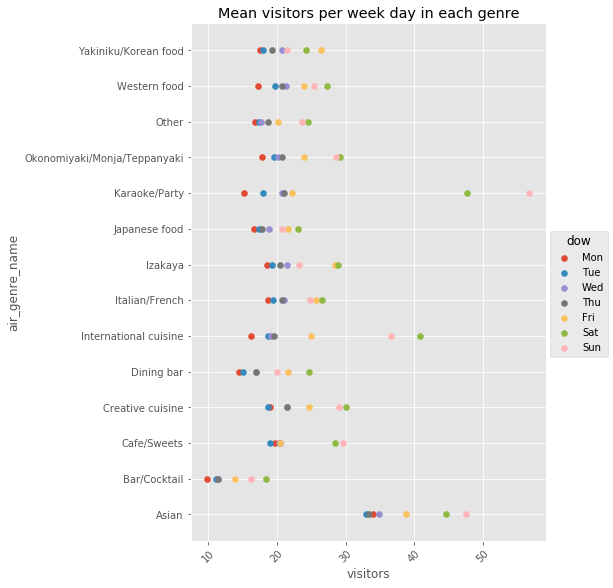

In [59]:
genres_name=air_visits_store_temp_wday['air_genre_name'].unique().tolist()

ax=sns.FacetGrid(air_visits_store_temp_wday, hue="dow",size=(8),aspect=1).map(plt.scatter, "visitors", "air_genre_name").add_legend()
ax.set_xticklabels(rotation=45)
plt.title('Mean visitors per week day in each genre');

**Observation:** 
1) The biggest difference between weekend and weekdays exists for the “Karaoke” bars, which rule the weekend. A similar trend, although with a considerably smaller gap, can be seen for the “International” cuisine.

2) No genre really goes against the trend of busier weekends. The smallest variations are in the generic “Other” category, the “Japanese” food, and also the “Korean” cuisine which is the only category where Fridays are the busiest days. General “Bars/Cocktail” are notably unpopular overall.

## 8.2) Impact of holidays

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Visitors wrt holiday flag')

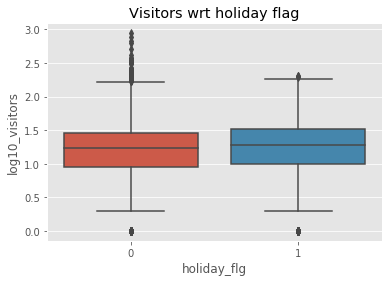

In [69]:
date_info.rename(columns={'calendar_date':'visit_date'},inplace=True)
air_visit_data_hols=pd.merge(air_visit_data,date_info,on=['visit_date'],how='left')

air_visit_data_hols['log10_visitors']=np.log10(air_visit_data_hols['visitors'])

sns.boxplot(
    x='holiday_flg',
    y='log10_visitors',
    data=air_visit_data_hols,
)
plt.title('Visitors wrt holiday flag')

**Observation:** Overall, holidays don’t have any impact on the average visitor numbers. As so often, more information is hidden in the details

In [61]:
avgd=air_visit_data_hols.groupby(['day_of_week','holiday_flg'])
avgd=avgd.agg(np.mean)

air_visit_data_hols_avg=pd.DataFrame(avgd)
air_visit_data_hols_avg.reset_index(inplace=True)

air_visit_data_hols_avg.rename(columns={'visitors':'average_number_visitors'},inplace=True)

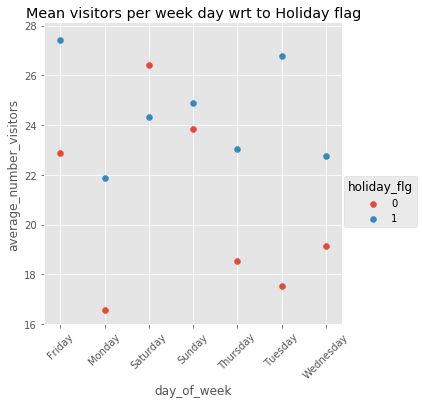

In [68]:
ax=sns.FacetGrid(air_visit_data_hols_avg, hue="holiday_flg",size=(5),aspect=1).map(plt.scatter, "day_of_week", "average_number_visitors").add_legend()
ax.set_xticklabels(rotation=45)
plt.title('Mean visitors per week day wrt to Holiday flag');

**Observation:** While a weekend holiday has little impact on the visitor numbers, and even decreases them slightly, there is a much more pronounced effect for the weekdays; especially Monday and Tuesday

# 8.3) Restaurants per area

In [105]:
cnts=air_store_info.groupby(['air_genre_name','air_area_name'])
cnts=cnts.agg(np.count_nonzero)

air_store_counts=pd.DataFrame(cnts)
air_store_counts.reset_index(inplace=True)

air_store_counts['air_area_short']=air_store_counts['air_area_name'].map(lambda x: str(x)[:12])

In [106]:
air_store_counts.head()

air_genre_name                               air_area_name  air_store_id  \
0          Asian                 Tōkyō-to Shibuya-ku Shibuya             2   
1   Bar/Cocktail              Fukuoka-ken Fukuoka-shi Daimyō             7   
2   Bar/Cocktail       Fukuoka-ken Fukuoka-shi Hakata Ekimae             2   
3   Bar/Cocktail  Hiroshima-ken Hiroshima-shi Kokutaijimachi             2   
4   Bar/Cocktail             Hokkaidō Asahikawa-shi 6 Jōdōri             4   

   latitude  longitude air_area_short  
0       2.0        2.0   Tōkyō-to Shi  
1       7.0        7.0   Fukuoka-ken   
2       2.0        2.0   Fukuoka-ken   
3       2.0        2.0   Hiroshima-ke  
4       4.0        4.0   Hokkaidō Asa

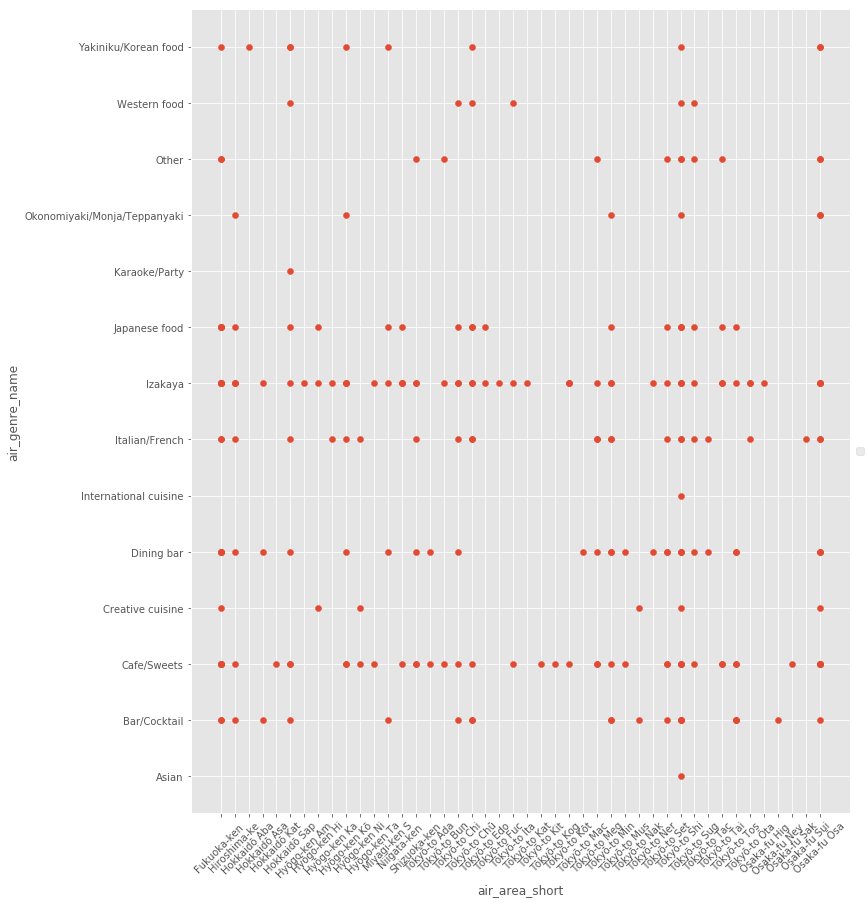

In [108]:
ax=sns.FacetGrid(air_store_counts,size=(12),aspect=1).map(plt.scatter, "air_area_short", "air_genre_name").add_legend()
ax.set_xticklabels(rotation=45)

**Observations:** 
1) Some areas have lots of restaurants and much variety, whereas others contain only a single air restaurant. Large parts of the parameter space are empty.

2) Similarly, some cuisines like “Izakaya” or “Cafe” are pretty ubiqutous, whereas others can only be found in a few areas. Note, that the only 2 Karaoke bars in the air sample are in “Hokkaido Sapporo-shi Minami 3 Jonishi”, whereas the only 2 “International cuisine” restaurants as well as the only two “Asian” places can be found in “Tokyo-to Shibuya-ku Shibuya”.

In [120]:
cnts=hpg_store_info.groupby(['hpg_genre_name','hpg_area_name'])
cnts=cnts.agg(np.count_nonzero)

hpg_store_counts=pd.DataFrame(cnts)
hpg_store_counts.reset_index(inplace=True)

hpg_store_counts['hpg_area_short']=hpg_store_counts['hpg_area_name'].map(lambda x: str(x)[:12])

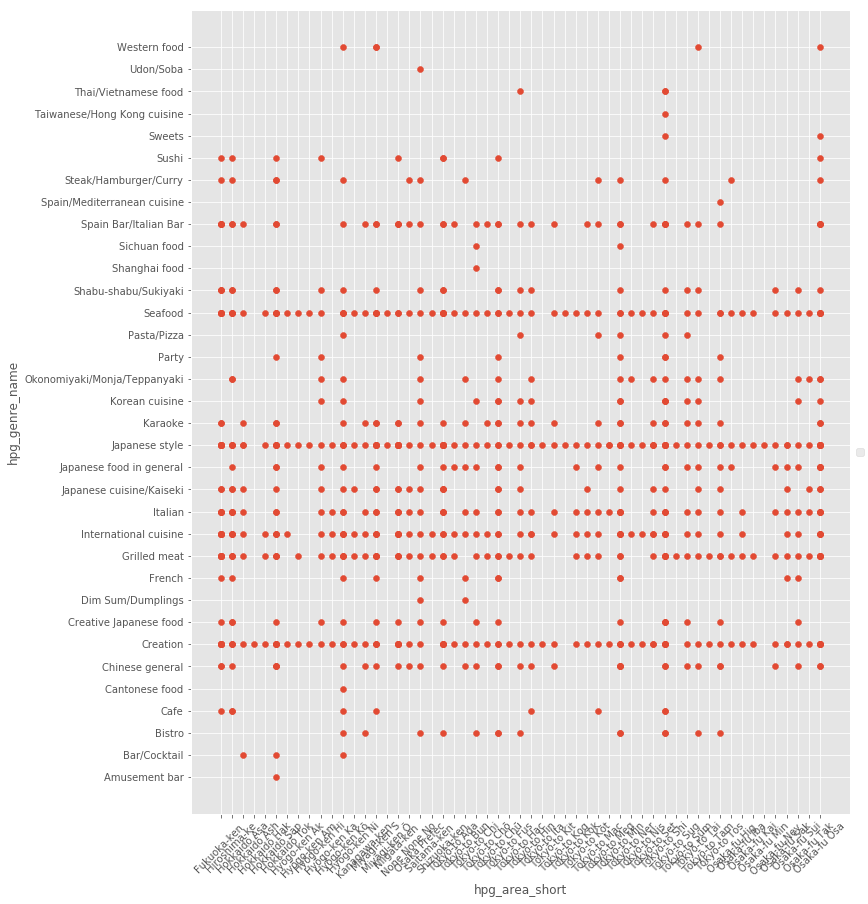

In [122]:
ax=sns.FacetGrid(hpg_store_counts,size=(12),aspect=1).map(plt.scatter, "hpg_area_short", "hpg_genre_name").add_legend()
ax.set_xticklabels(rotation=45)

**Observations:**
1) Also here there are busy areas and those with only a few restaurants. Unsurprisingly, Tokyo features prominently in the areas with a lot of culinary diversity.

2) “Japanese style” and “International cuisine” are popular pretty much everywhere. “Amusement bars” and “Udon/Soba” places are rare, as are “Shanghai food” or “Dim Sum”

# 8.4) Visualizing reservations in hpg/air reserve

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


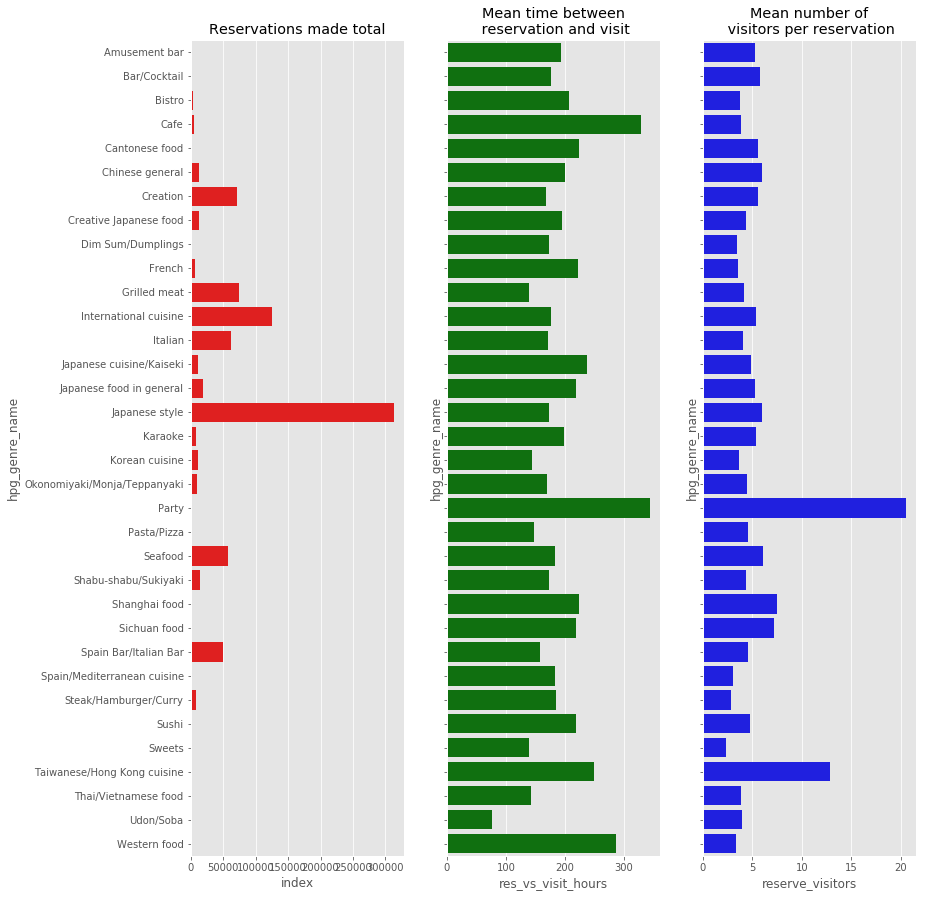

In [137]:
df_genre = df_res_merged[df_res_merged.hpg_genre_name != 'No Data'].groupby(['hpg_genre_name']) \
                        .agg({'index':'size', 'reserve_visitors':'mean', 'res_vs_visit_hours':'mean'})\
                        .reset_index()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13, 15))
ax1.set_title('Reservations made total')
ax2.set_title('Mean time between\n reservation and visit')
ax3.set_title('Mean number of\n visitors per reservation')
sns.barplot(x='index', y='hpg_genre_name', data=df_genre,
            ax=ax1, color='r')
sns.barplot(x='res_vs_visit_hours', y='hpg_genre_name', data=df_genre, 
            ax=ax2, color='g')
sns.barplot(x='reserve_visitors', y='hpg_genre_name', data=df_genre, 
            ax=ax3, color='b')

**Observations:**
1) Japanese style is far and away the most popular

2) Looks like there is usually a long time between the reservation and visit for "Party" type restaurants. Also the number of people on the reservation is significantly larger than most others.

How about according to the "Air" data?

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


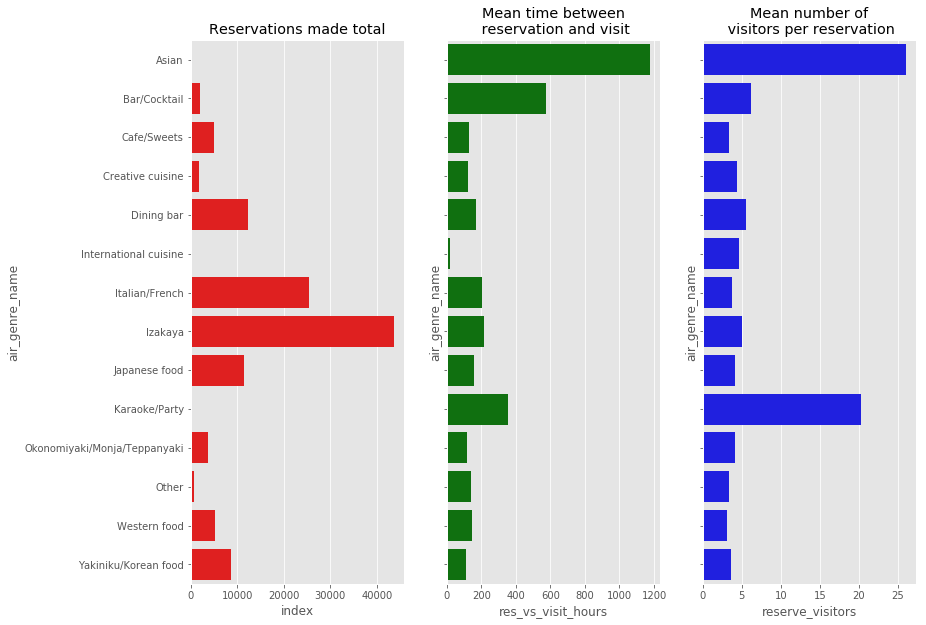

In [138]:
df_genre = df_res_merged[df_res_merged.air_genre_name != 'No Data'].groupby(['air_genre_name']) \
                        .agg({'index':'size', 'reserve_visitors':'mean', 'res_vs_visit_hours':'mean'})\
                        .reset_index()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13, 10))
ax1.set_title('Reservations made total')
ax2.set_title('Mean time between\n reservation and visit')
ax3.set_title('Mean number of\n visitors per reservation')
sns.barplot(x='index', y='air_genre_name', data=df_genre,
            ax=ax1, color='r')
sns.barplot(x='res_vs_visit_hours', y='air_genre_name', data=df_genre, 
            ax=ax2, color='g')
sns.barplot(x='reserve_visitors', y='air_genre_name', data=df_genre, 
            ax=ax3, color='b')

**Observations:**
1) Japanese styles (Izakaya + Japanese Food) again most popular

2) Unlike the "HPG" data there is no significant time difference between the reservation and visit however there is a larger average number of visitors per reservation

3) There also seems to be a similar pattern with Asian however this could be an anomaly due to limited data points

What if we looked at this based on whether the visit occured on a holiday?

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


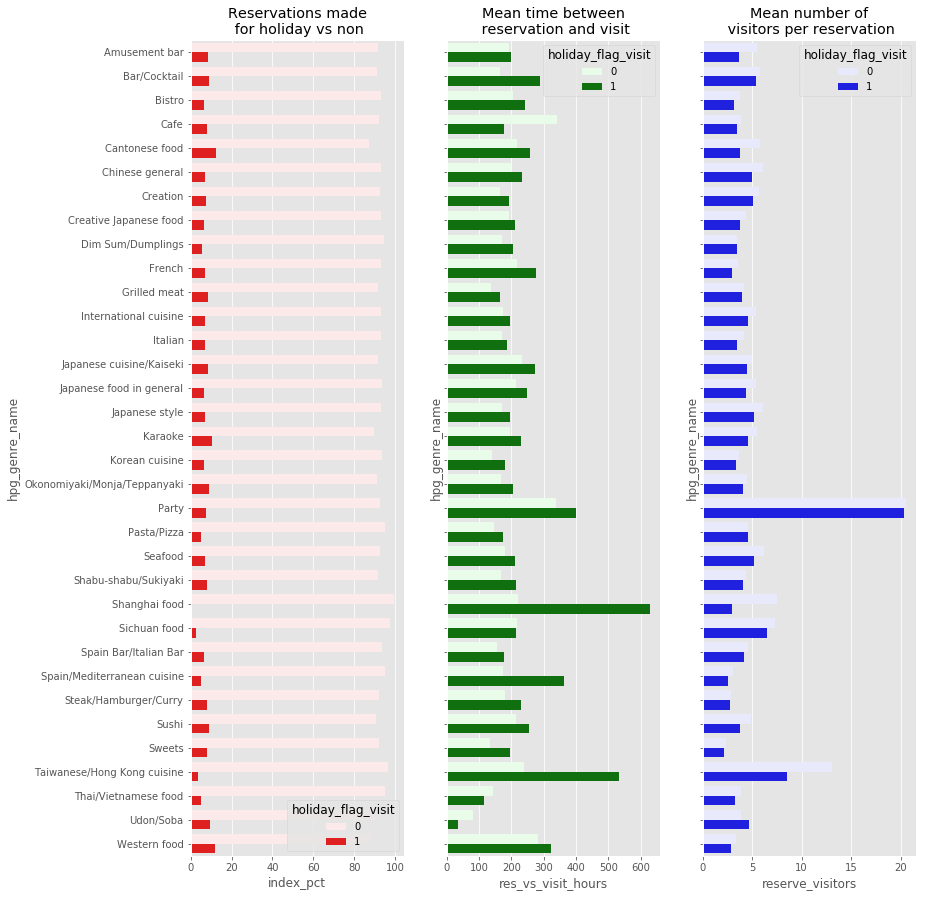

In [139]:
# plot holiday vs non holiday
df_genre_by_holiday = df_res_merged.groupby(['hpg_genre_name', 'holiday_flag_visit']) \
                                   .agg({'index':'size', 'reserve_visitors':'mean', 'res_vs_visit_hours':'mean'}) 

test = pd.DataFrame(df_genre_by_holiday.groupby(level=0)['index'].apply(lambda x:100 * x / float(x.sum())))
test.rename(columns={"index": "index_pct"}, inplace=True)

df_genre_by_holiday = df_genre_by_holiday.merge(test, left_index=True, right_index=True).reset_index()
            
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13, 15))
ax1.set_title('Reservations made\n for holiday vs non')
ax2.set_title('Mean time between\n reservation and visit')
ax3.set_title('Mean number of\n visitors per reservation')
sns.barplot(x='index_pct', y='hpg_genre_name', data=df_genre_by_holiday,
            ax=ax1, hue='holiday_flag_visit', hue_order=[0,1], color='r')
sns.barplot(x='res_vs_visit_hours', y='hpg_genre_name', data=df_genre_by_holiday, 
            ax=ax2, hue='holiday_flag_visit', hue_order=[0,1], color='g')
sns.barplot(x='reserve_visitors', y='hpg_genre_name', data=df_genre_by_holiday, 
            ax=ax3, hue='holiday_flag_visit', hue_order=[0,1], color='b')

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


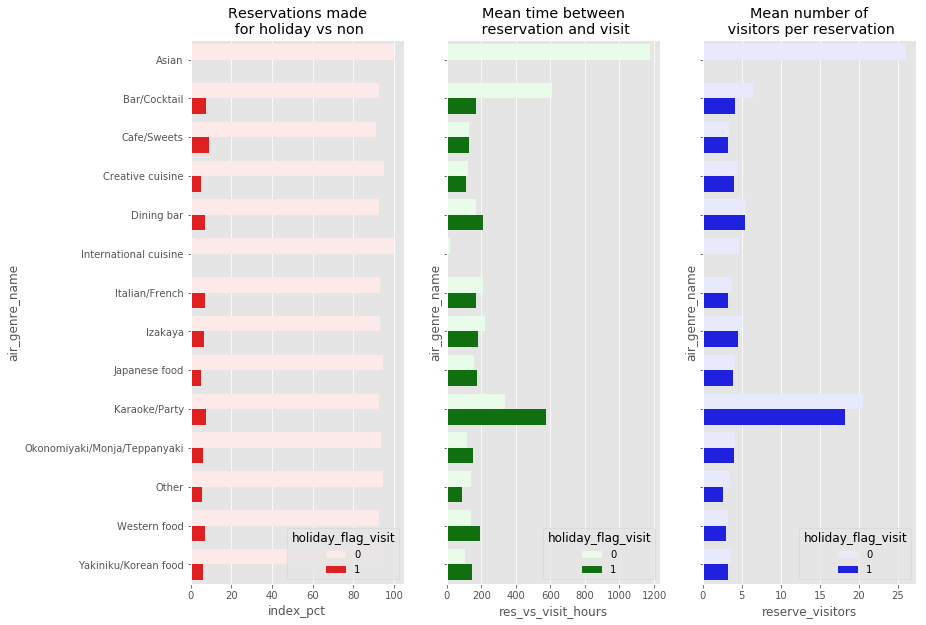

In [140]:
# plot holiday vs non holiday
df_genre_by_holiday = df_res_merged.groupby(['air_genre_name', 'holiday_flag_visit']) \
                                   .agg({'index':'size', 'reserve_visitors':'mean', 'res_vs_visit_hours':'mean'}) 

test = pd.DataFrame(df_genre_by_holiday.groupby(level=0)['index'].apply(lambda x:100 * x / float(x.sum())))
test.rename(columns={"index": "index_pct"}, inplace=True)

df_genre_by_holiday = df_genre_by_holiday.merge(test, left_index=True, right_index=True).reset_index()
            
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13, 10))
ax1.set_title('Reservations made\n for holiday vs non')
ax2.set_title('Mean time between\n reservation and visit')
ax3.set_title('Mean number of\n visitors per reservation')
sns.barplot(x='index_pct', y='air_genre_name', data=df_genre_by_holiday, 
            ax=ax1, hue='holiday_flag_visit', hue_order=[0,1], color='r')
sns.barplot(x='res_vs_visit_hours', y='air_genre_name', data=df_genre_by_holiday, 
            ax=ax2, hue='holiday_flag_visit', hue_order=[0,1], color='g')
sns.barplot(x='reserve_visitors', y='air_genre_name', data=df_genre_by_holiday, 
            ax=ax3, hue='holiday_flag_visit', hue_order=[0,1], color='b')

**Observation:**
1) Using the percentage of reservations on holidays vs non holidays it appears there are some types of restaurants that are more popular than others, at least with the "HPG" data. Is there a pattern eg/ are those that a more "fun" or "out of the ordinary" more popular? Not enough data to really answer that.

2) For some genres the time between reservation and visit as well as the number of visitors appears to have some fluctuation. Is it statistically significant? Not sure there is enough data to make a conclusion.

In [141]:
df_res_merged.hpg_genre_name.fillna('No Data', inplace=True)
df_res_merged.air_genre_name.fillna('No Data', inplace=True)
df_res_merged.hpg_store_id.fillna('No Data', inplace=True)
df_res_merged.air_store_id.fillna('No Data', inplace=True)
df_res_merged['air_genre_2'] = df_res_merged['air_genre_name'].map(genres)
df_res_merged['hpg_genre_2'] = df_res_merged['hpg_genre_name'].map(genres)

# take hpg genre first then air
df_res_merged['genre_2']=df_res_merged['hpg_genre_2']
df_res_merged.loc[df_res_merged['hpg_genre_2']=='No Data',['genre_2']] = df_res_merged['air_genre_2']

**Observations: lot of missing values because of holidays or late recording of air vists**

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


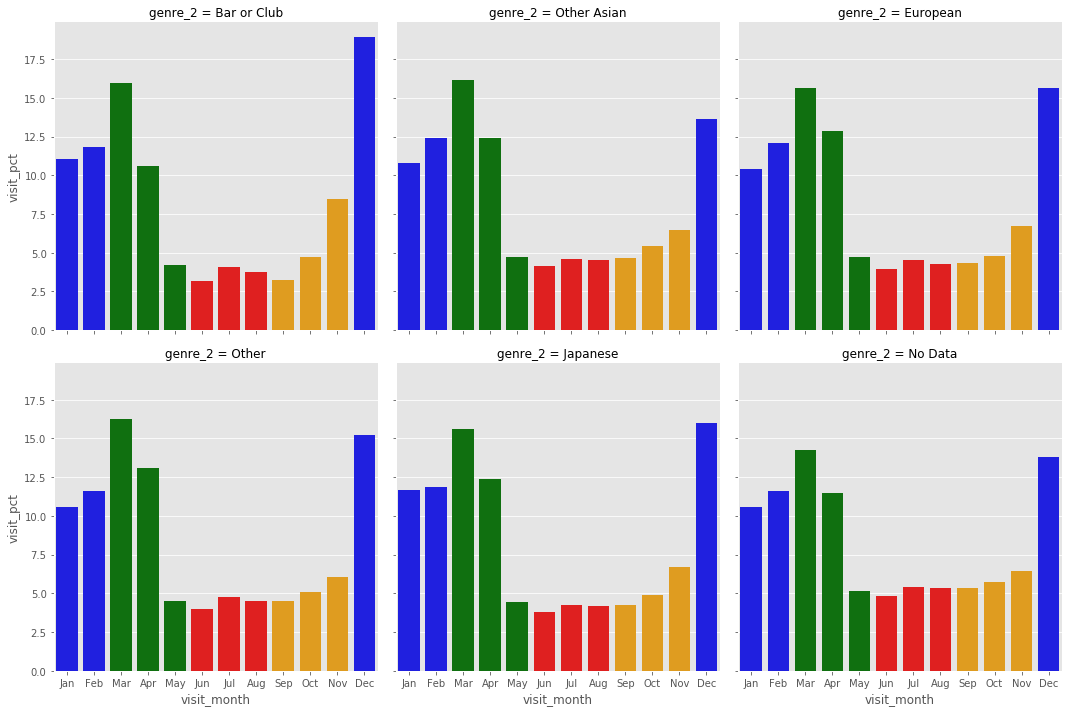

In [142]:
# Reservation visits per season
df_visit_by_season = df_res_merged.groupby(['genre_2','visit_season','visit_month']) \
                             .agg({'index':'size'}) \
                             .reset_index() 
df_visit_by_season['total_size'] = df_visit_by_season.groupby('genre_2')['index'].transform('sum')
df_visit_by_season.sort_values(by='total_size', inplace=True)
df_visit_by_season['visit_pct'] = (df_visit_by_season['index'] / df_visit_by_season['total_size'])*100
        
pal=['blue','blue','green','green','green', 'red','red','red', 'orange','orange','orange', 'blue']
g = sns.FacetGrid(df_visit_by_season, col="genre_2", col_wrap=3, size=5)
g.map(sns.barplot, "visit_month", "visit_pct", palette=pal, order=['Jan','Feb','Mar','Apr','May','Jun',
           'Jul','Aug','Sep','Oct','Nov','Dec'])

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


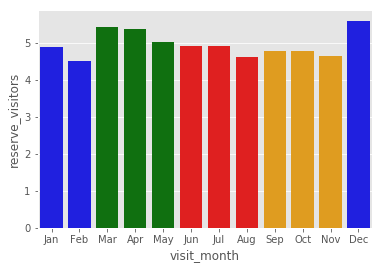

In [143]:
# Reservation visits per season
df_res_visitors_by_season = df_res_merged.groupby(['visit_month']) \
                             .agg({'reserve_visitors':'mean'}) \
                             .reset_index() 
pal=['blue','blue','green','green','green', 'red','red','red', 'orange','orange','orange', 'blue']
sns.barplot("visit_month", "reserve_visitors", data=df_res_visitors_by_season, palette=pal, 
            order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

**Observations:**
1) When grouping the genres together there doesn't appear to be any differing patterns that stand out.

2) It appears that reservations are more common in winter and spring rather than the summer

3) Reservations drop off as spring progresses and increase as autumn turns to winter.

4) Number of visitors per reservation don't really change much over the seasons

# 8.5)Air-restaurant visitors from reservations vs total visitors

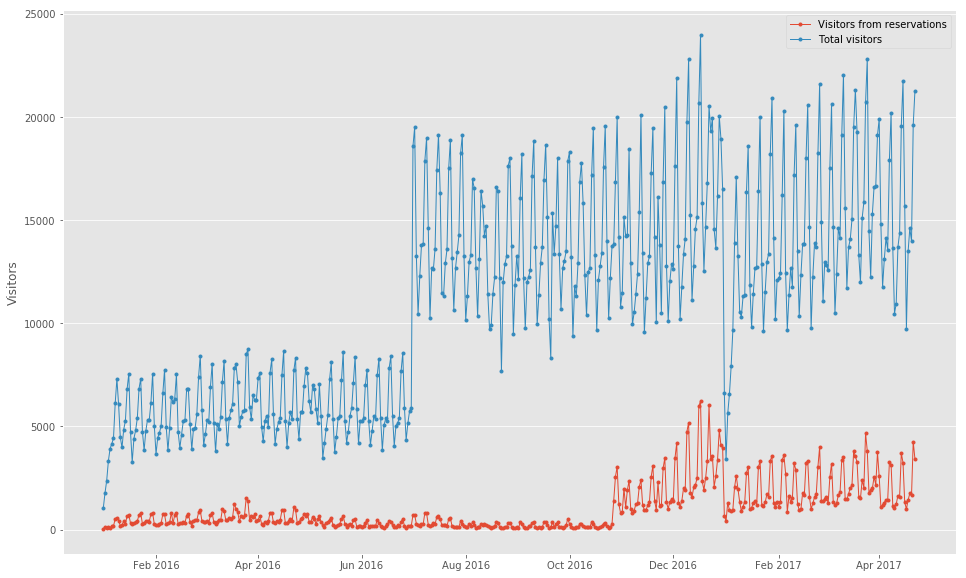

In [164]:
# Visitors from reservations vs Total visitors
air_res_store = df_res_merged.groupby(['air_store_id', 'calendar_date'])\
                             .agg({'reserve_visitors':'sum'}) \
                             .reset_index() \
                             .rename(columns={'calendar_date':'visit_date'})
air_res_store['visit_date'] = air_res_store.visit_date.apply(lambda x: str(x))
df_air_visit['visit_date'] = df_air_visit.visit_date.apply(lambda x: str(x))
air_res_store['air_store_id'] = air_res_store.air_store_id.apply(lambda x: str(x))
df_air_visit['air_store_id'] = df_air_visit.air_store_id.apply(lambda x: str(x))
air_res = pd.merge(df_air_visit, air_res_store,  how='left', 
                         left_on=['air_store_id','visit_date'], right_on = ['air_store_id','visit_date'])
air_res.reserve_visitors.fillna(0.0, inplace=True)
air_res_date = air_res.groupby('visit_date')\
                 .agg({'reserve_visitors':'sum', 'visitors':'sum'}) \
                 .reset_index()
air_res_date['visit_date'] = air_res_date.visit_date.apply(lambda x: pd.to_datetime(x).date())
f, ax1 = plt.subplots(figsize=(16, 10))
ax1.plot_date(x='visit_date', y=air_res_date.loc[:,['reserve_visitors', 'visitors']], data=air_res_date, ms=3, ls='solid', lw=1)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.grid(b=None, axis='x')
ax1.set_ylabel('Visitors')
ax1.legend(['Visitors from reservations', 'Total visitors'])

**Observations:**
1) There is a big jump in total visitors from Jul 2016. What causes this?

2) As noted during the analysis of the reservation data there is a significant jump in reservations in November 2016 however this does not appear to have an impact on the number of total visitors.

3) Both datasets have a signficant climb and precipitous dropoff around the new year period.

4) Reservations through these services only provide ~25% of the clientele

# 8.6) Number of restaurants air and Hpg spatial view

C:\Users\namanda\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


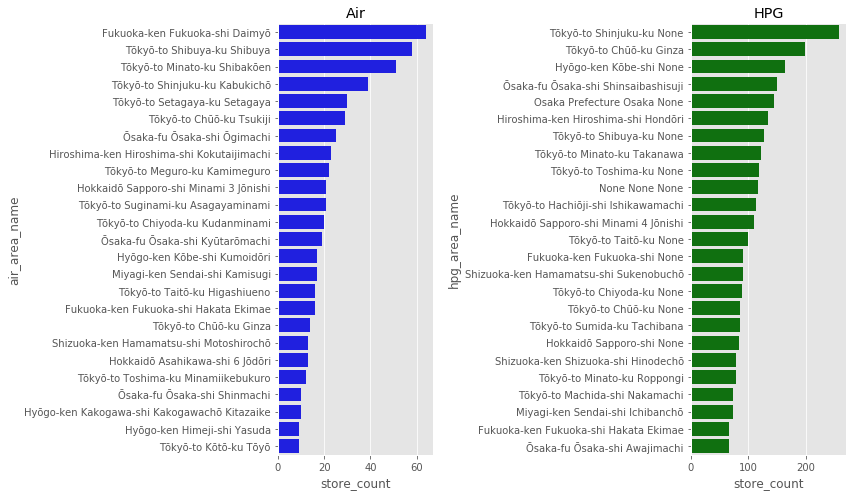

In [166]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,7))

store_counts_air=pd.DataFrame(df_air_store.air_area_name.value_counts()).reset_index()
store_counts_air.rename(columns={'air_area_name':'store_count','index':'air_area_name'},inplace=True)
store_counts_hpg=pd.DataFrame(df_hpg_store.hpg_area_name.value_counts()).reset_index()
store_counts_hpg.rename(columns={'hpg_area_name':'store_count','index':'hpg_area_name'},inplace=True)

sns.barplot(y='air_area_name',x='store_count',data=store_counts_air.head(25),color='b', ax=ax1)
sns.barplot(y='hpg_area_name',x='store_count',data=store_counts_hpg.head(25),color='g', ax=ax2)

ax1.set_title('Air')
ax2.set_title('HPG')
plt.tight_layout()

**Observations:** Highest air restaurants in Fukuoka, Higherst Hpg restaurants in Tokyo confirms from the maps above

# 9) About the time period for training and testing

In [172]:
dates=air_visit_data['visit_date'].unique()
train_period=(pd.to_datetime(dates))
test= pd.read_csv('sample_submission.csv')
test_period=(test["id"].str.split('_').str[-1])
test_period=pd.to_datetime(test_period.unique())
train_period=list(train_period)
test_period=list(test_period)

In [176]:
train_dataset=pd.DataFrame({'date':train_period,'type':'train'})
test_dataset=pd.DataFrame({'date':test_period,'type':'test'})
frames = [train_dataset, test_dataset]
dataset=pd.concat(frames)
dataset['month']=dataset['date'].dt.month
dataset['year']=dataset['date'].dt.year

In [177]:
dataset.head()

date   type  month  year
0 2016-01-13  train      1  2016
1 2016-01-14  train      1  2016
2 2016-01-15  train      1  2016
3 2016-01-16  train      1  2016
4 2016-01-18  train      1  2016

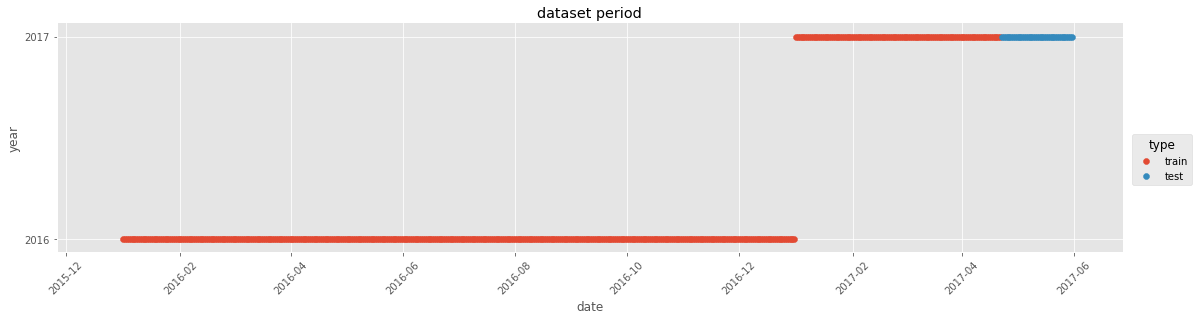

In [178]:
ax=sns.FacetGrid(dataset, hue="type",size=(4),aspect=4).map(plt.scatter, "date", "year").add_legend()
ax.set_xticklabels(rotation=45)
plt.title('dataset period');
ax.set(yticks=[2016,2017])

# 10) Conclusions

**Very important Observations:**
1) Every restaurant should be considered as a time series problem but unfortunately there is lot of missing data either because of holidays or for some the recording of the number of visitors started later than Jan 2016

2) Should check in the ARIMA model whether interpolation of the missing values will work or not? Not a big fan of doing this, adds unnecessary noise to the data

3) There are lot of missing values when combining the hpg and air tables because hpg has more genres and areas covered

4) There are lot of genres, so bucketting or combining them into 5 or 6 categories will be better

5) Weekly pattern is clearly evident

6) Reservations are made only in the couple of hours before visits, long term reservations are very important

7) Found outliers in the air visitors should check how to remove them

8) Air areas are actually a combination of three parts, city,district and area, should split them in feat to explore more features